# 1. Import libraries

In [115]:
#standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#OLS analysis
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
from scipy.stats import chi2_contingency

# 2. Load data

In [116]:
#CSVs from data_cleaning.py
df_1 = pd.read_csv('data_cleaning/df_title_loc_comp_salary.csv')
df_2 = pd.read_csv('data_cleaning/df_qualifications.csv')
df_3 = pd.read_csv('data_cleaning/df_benefits.csv')

In [117]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1287 non-null   int64  
 1   Title       1287 non-null   object 
 2   Company     1285 non-null   object 
 3   Location    1116 non-null   object 
 4   Salary      1209 non-null   float64
 5   Levels      1287 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 60.5+ KB


In [118]:
df_1.head()

,Unnamed: 0,Title,Company,Location,Salary,Levels
0,0,Data Scientist,Numerdox,"Sacramento, CA",110000.0,Jr.
1,1,Data Analyst,Cepheid,"Lodi, CA",120000.0,Unknown
2,2,Data Scientist,Cepheid,"Sunnyvale, CA",150000.0,Staff
3,3,Data Scientist,Verana Health,"San Francisco, CA",150000.0,Unknown
4,4,Data Scientist,Tinder,"San Francisco, CA",130000.0,Jr.


In [119]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Columns: 363 entries, Unnamed: 0 to Editing
dtypes: float64(362), int64(1)
memory usage: 3.6 MB


In [120]:
df_2.head()

,Unnamed: 0,Analysis skills,Communication skills,Research,R,Machine learning,Bachelor's degree,Master's degree,Doctoral degree,Doctor of Philosophy,...,Spectroscopy,SoC,GLP,CGMP,Bootstrap,Lending,Grant writing,Pass polygraph test,Pivot tables,Editing
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 53 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           1287 non-null   int64  
 1   Health insurance                     558 non-null    float64
 2   Paid time off                        558 non-null    float64
 3   Commuter assistance                  558 non-null    float64
 4   Employee stock purchase plan         558 non-null    float64
 5   401(k) matching                      558 non-null    float64
 6   401(k)                               558 non-null    float64
 7   Dental insurance                     558 non-null    float64
 8   Employee assistance program          558 non-null    float64
 9   Unlimited paid time off              558 non-null    float64
 10  Work from home                       558 non-null    float64
 11  Flexible schedule             

In [122]:
df_3.head()

,Unnamed: 0,Health insurance,Paid time off,Commuter assistance,Employee stock purchase plan,401(k) matching,401(k),Dental insurance,Employee assistance program,Unlimited paid time off,...,Cell phone reimbursement,On-site gym,Bereavement leave,Relocation assistance,Family leave,Free parking,Meals & incidentals stipend,Employee stock ownership plan,Free massages,Green card sponsorship
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3. Data cleaning

In [123]:
df_1 = df_1.drop('Unnamed: 0', axis=1)
df_2 = df_2.drop('Unnamed: 0', axis=1)
df_3 = df_3.drop('Unnamed: 0', axis=1)

In [124]:
for i in df_2.columns:
    df_2.loc[:,i] = df_2.loc[:,i].astype('Int64')
    
for i in df_3.columns:
    df_3.loc[:,i] = df_3.loc[:,i].astype('Int64')

# 4. EDA

In [125]:
pd.pivot_table(df_1, 'Salary', index=['Title'], columns=['Levels'])

Levels,Distinguished,Jr.,Lead,Principal,Sr.,Staff,Unknown
Title,,,,,,,
Applied Scientist,NaN,NaN,NaN,130000.000000,157142.857143,156666.666667,146666.666667
Data Analyst,NaN,82666.666667,150000.000000,96000.000000,132699.250000,130000.000000,95044.444444
Data Architect,190000.0,NaN,NaN,NaN,170000.000000,NaN,200000.000000
Data Engineer,NaN,NaN,NaN,NaN,139310.344828,NaN,133846.153846
Data Science Manager,NaN,NaN,NaN,NaN,NaN,NaN,160365.079365
Data Scientist,NaN,126736.000000,169545.454545,179760.000000,165748.325359,151021.000000,131012.383333
Director of Data Science,NaN,NaN,NaN,NaN,NaN,NaN,231909.090909
Head of Data Science,NaN,NaN,NaN,NaN,NaN,NaN,175000.000000
Machine Learning Engineer,NaN,154000.000000,172000.000000,200000.000000,176176.121951,167500.000000,143733.333333


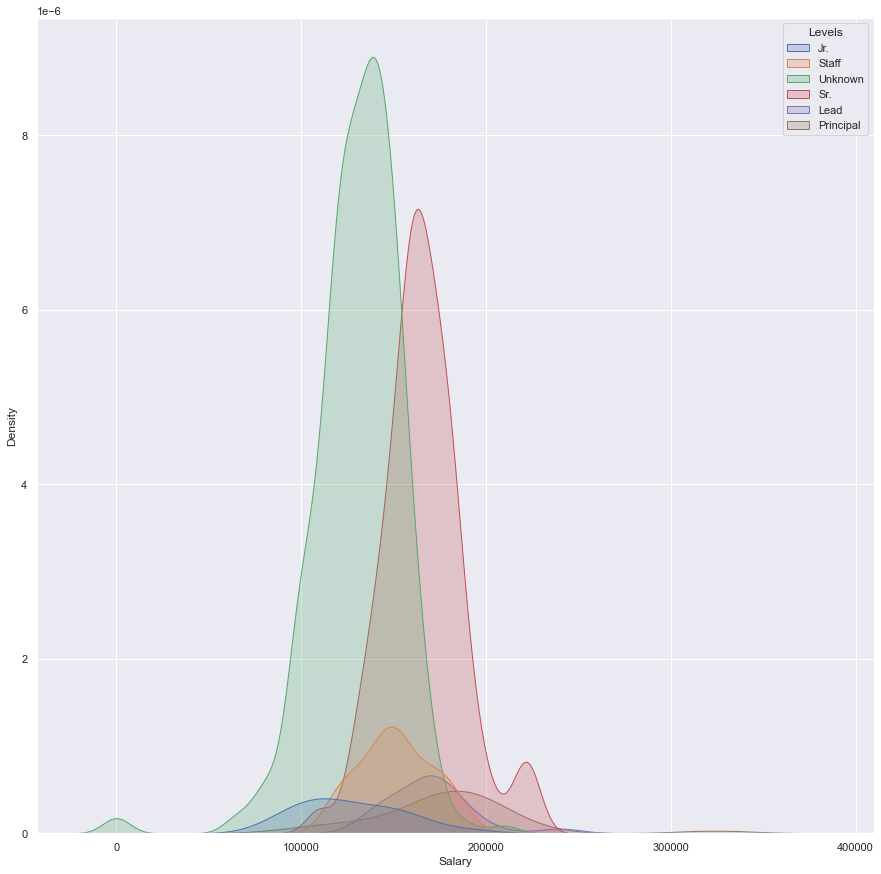

In [126]:
plt.figure(figsize=(15, 15))
sns.kdeplot(data = df_1[df_1.Title=='Data Scientist'], x='Salary', hue='Levels', shade='fill')
plt.show()

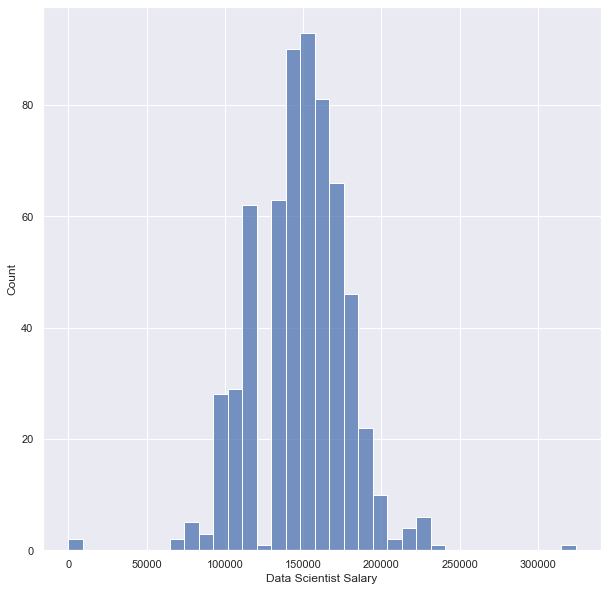

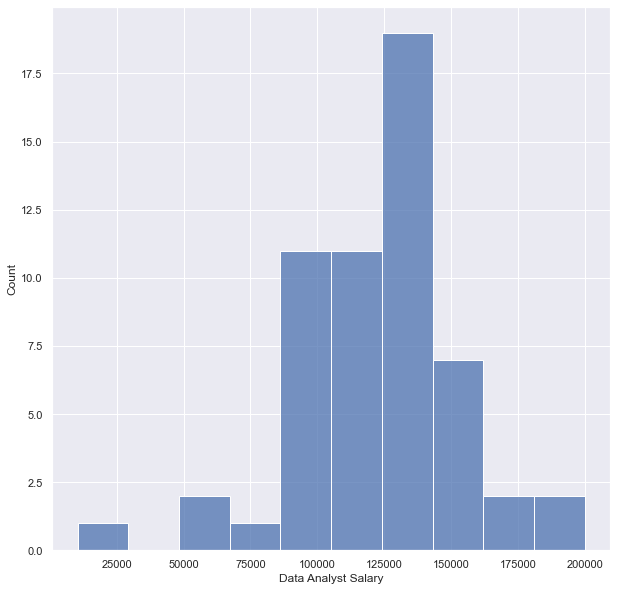

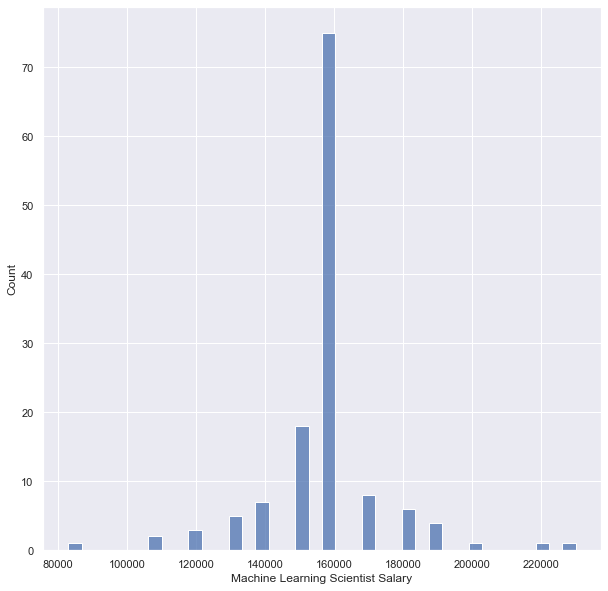

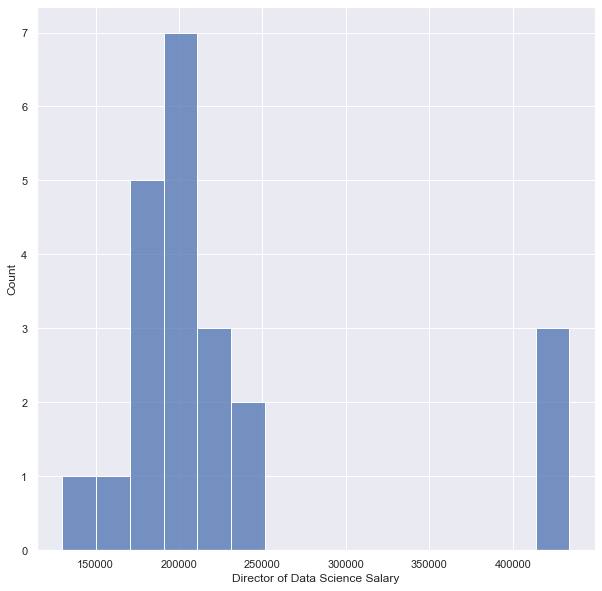

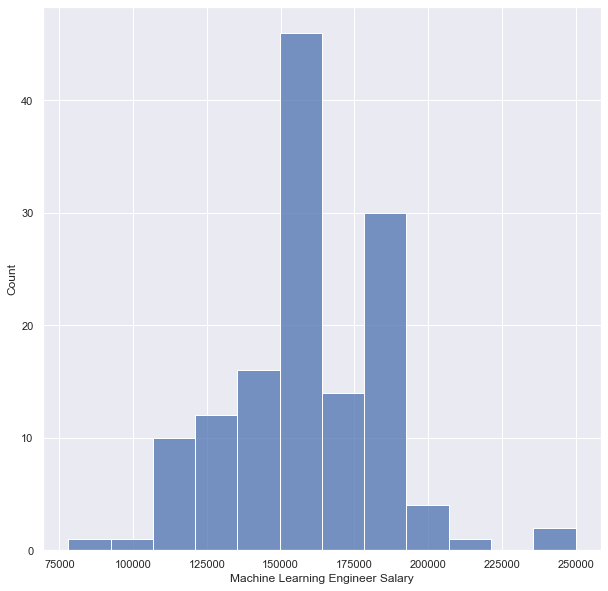

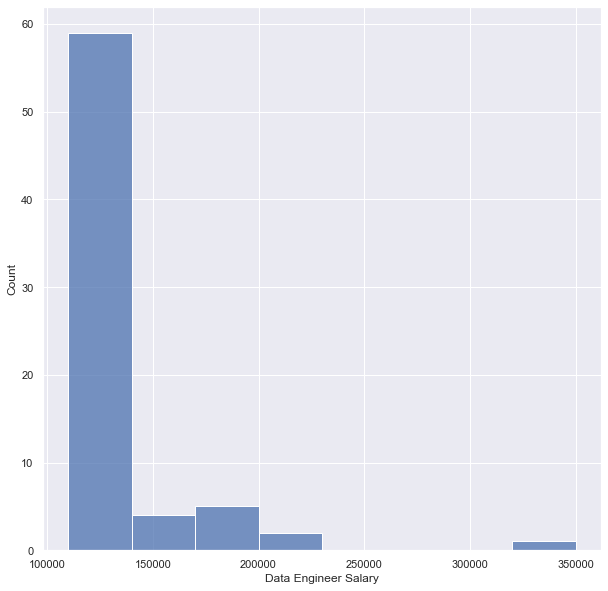

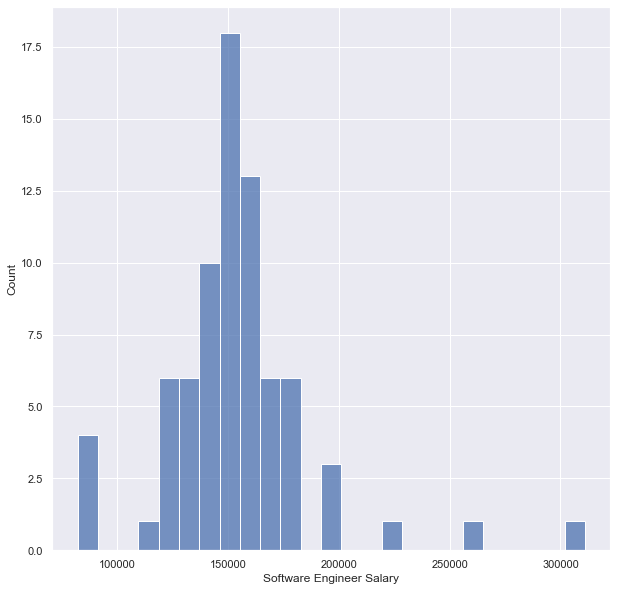

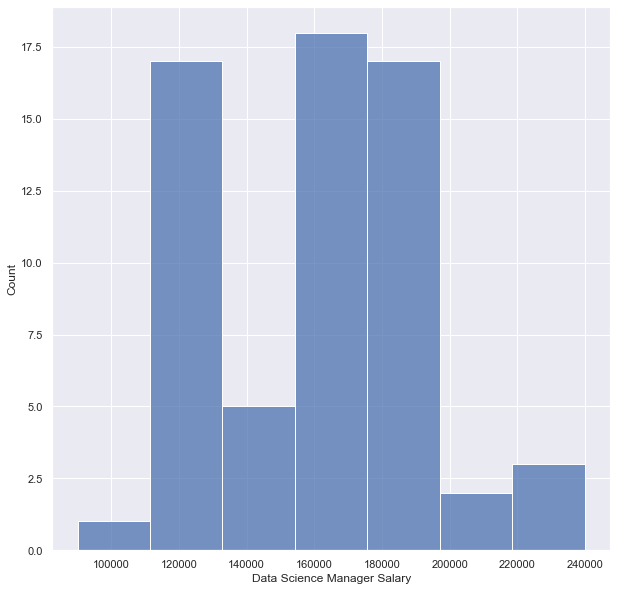

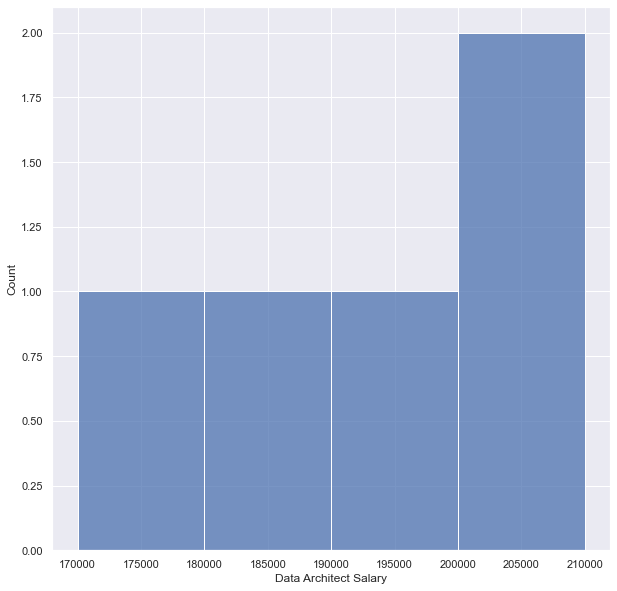

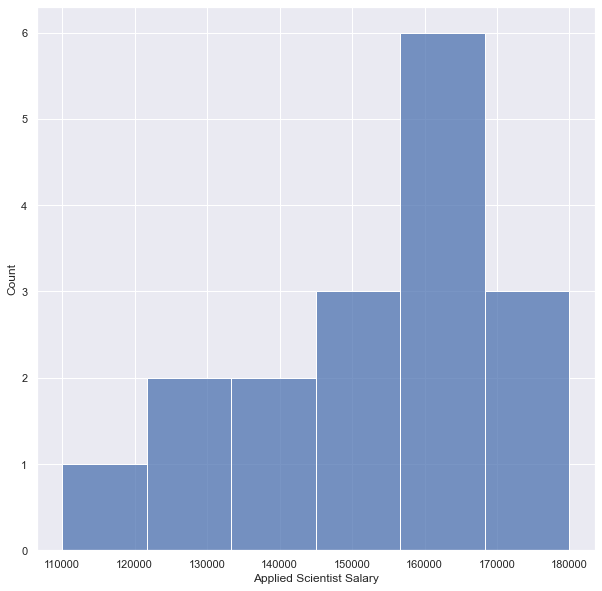

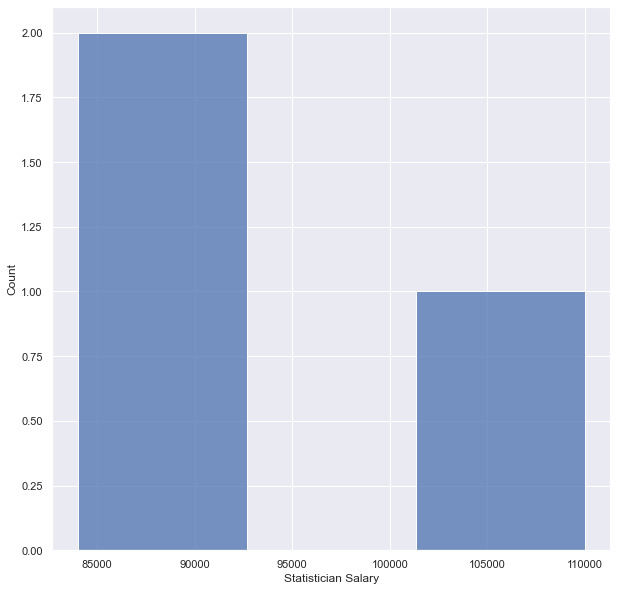

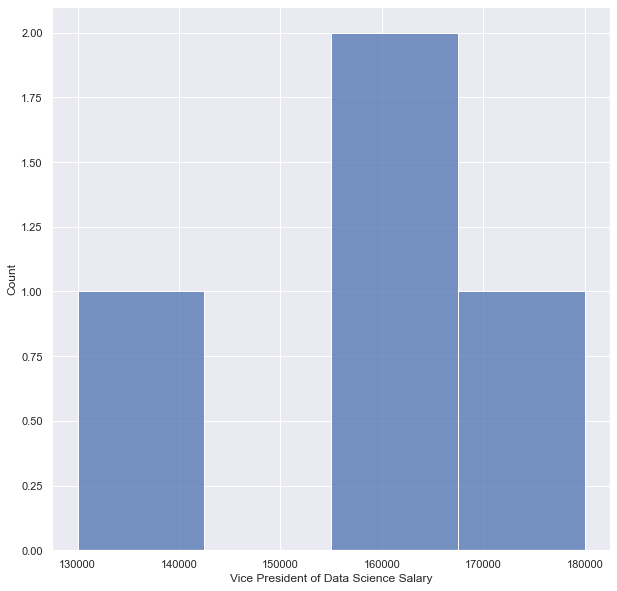

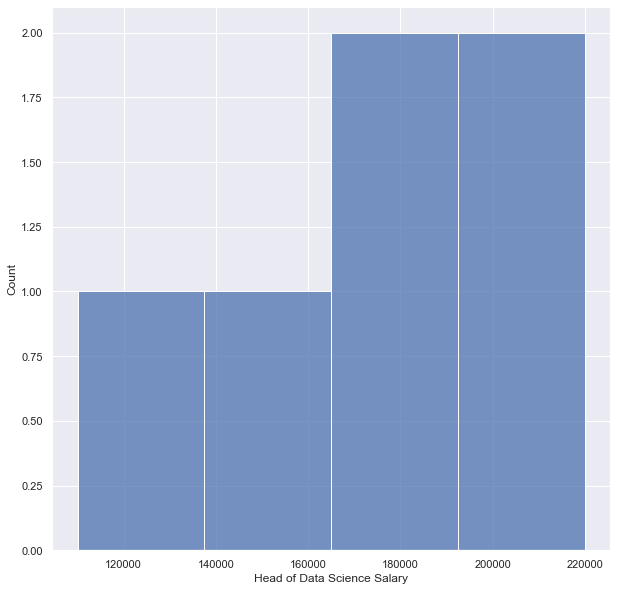

In [127]:
for i in df_1.Title.unique():
    plt.figure(figsize=(10, 10))
    sns.histplot(data = df_1[df_1.Title==i], x='Salary')
    plt.xlabel('{} Salary'.format(i))
    plt.show()

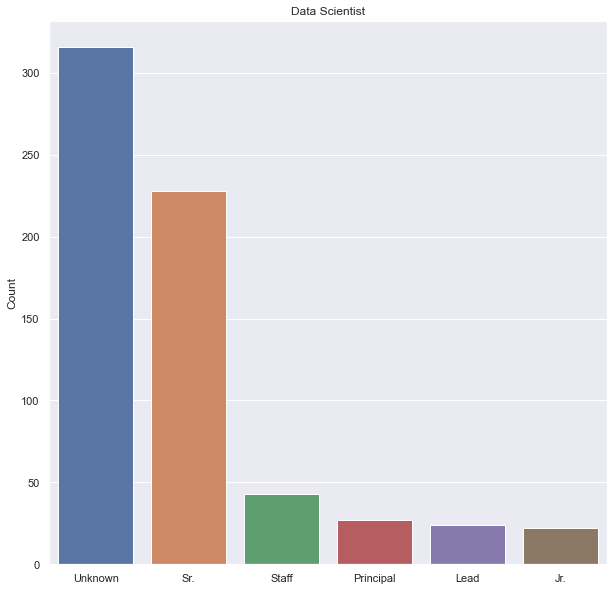

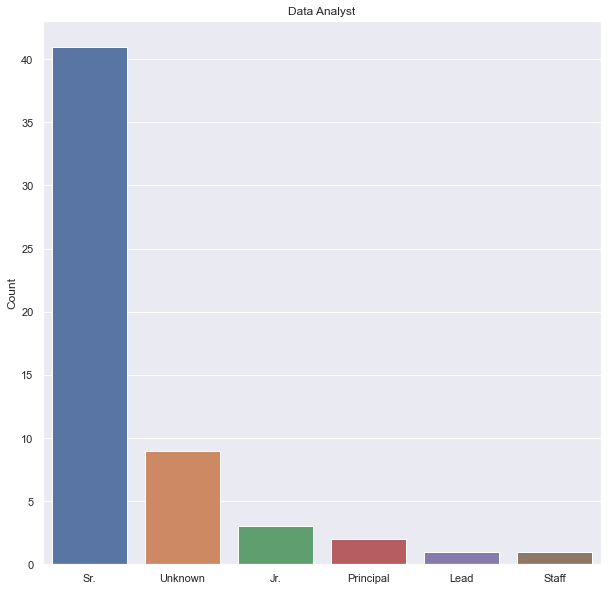

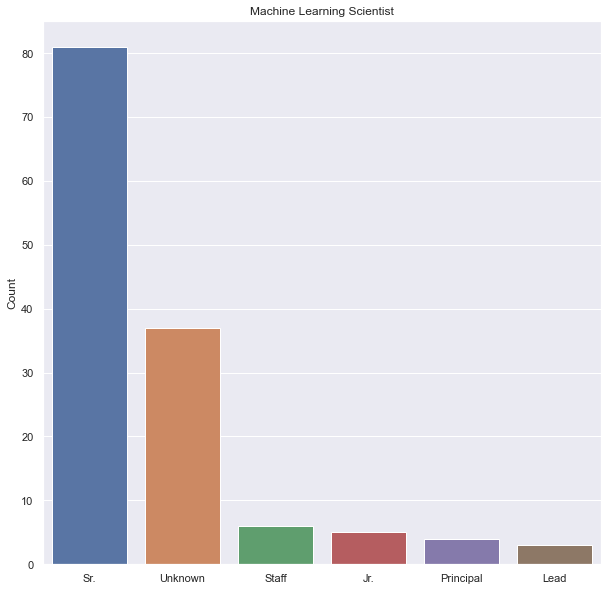

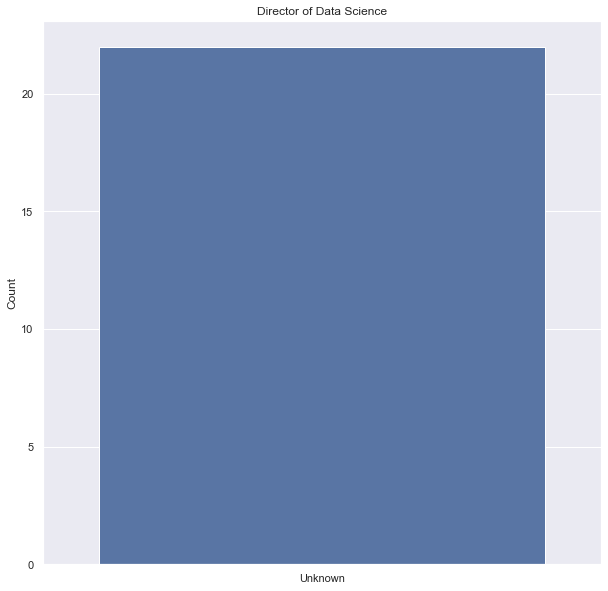

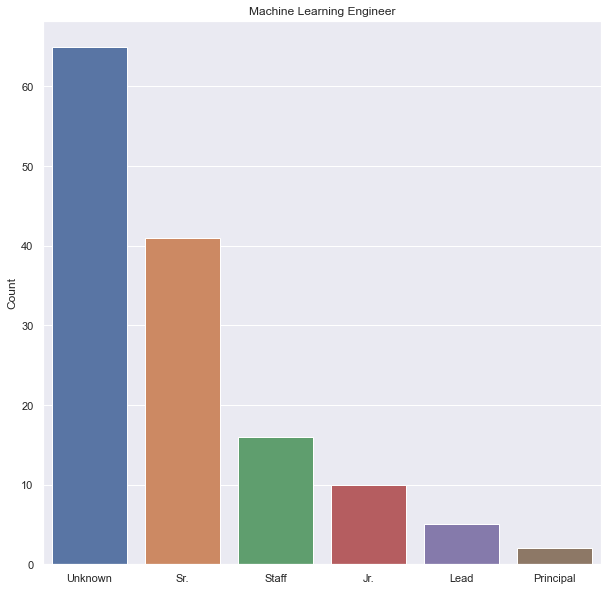

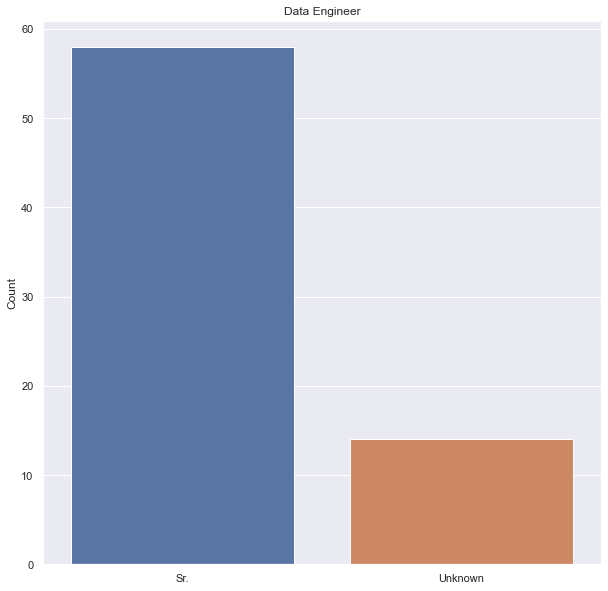

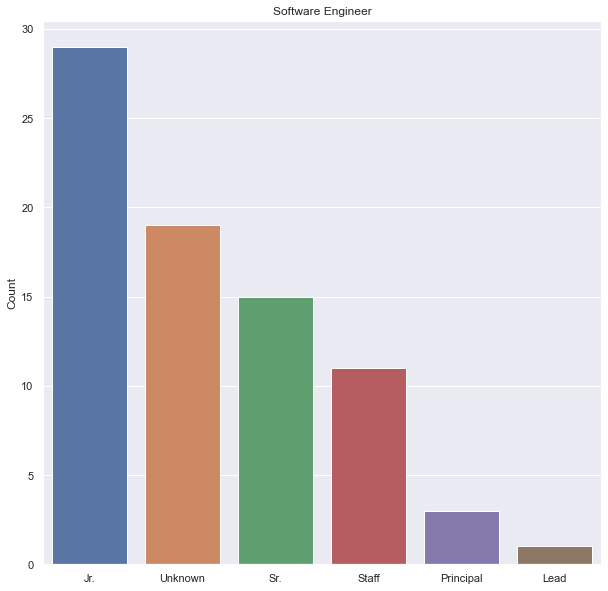

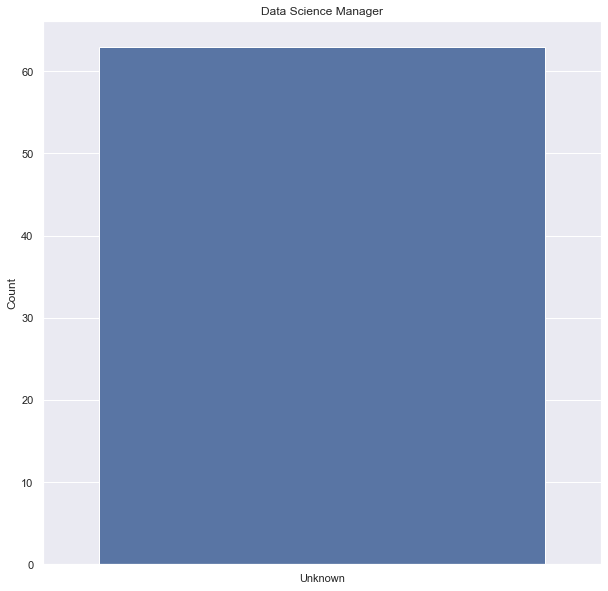

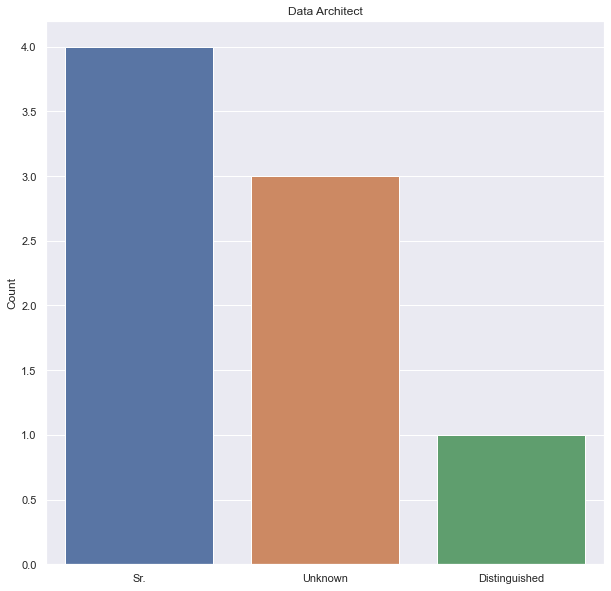

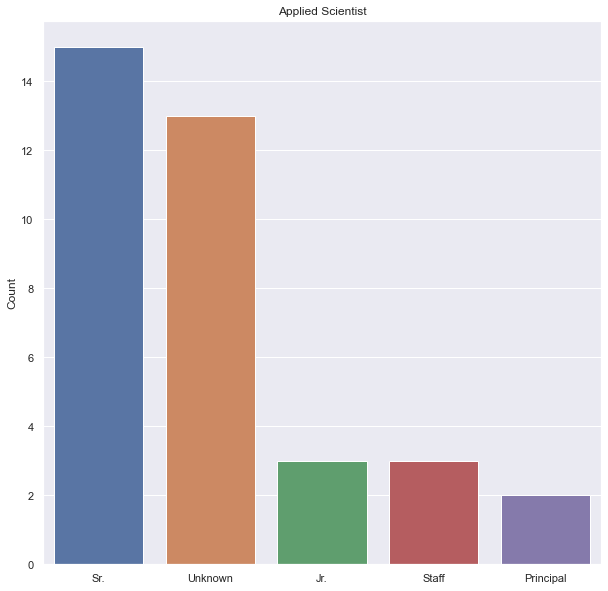

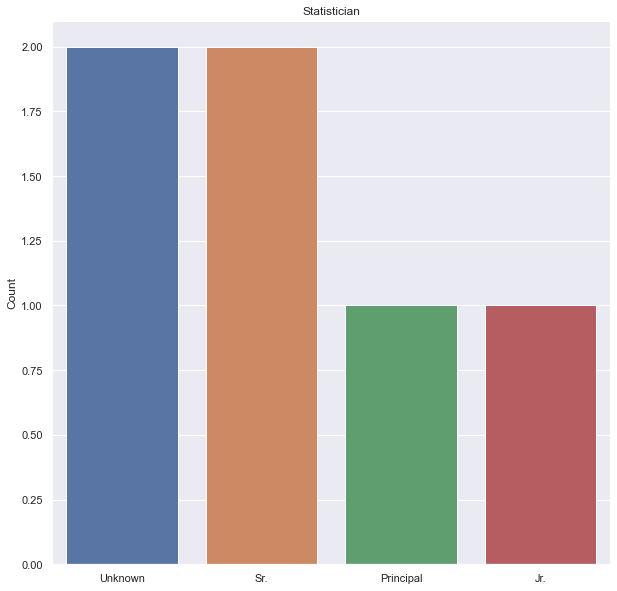

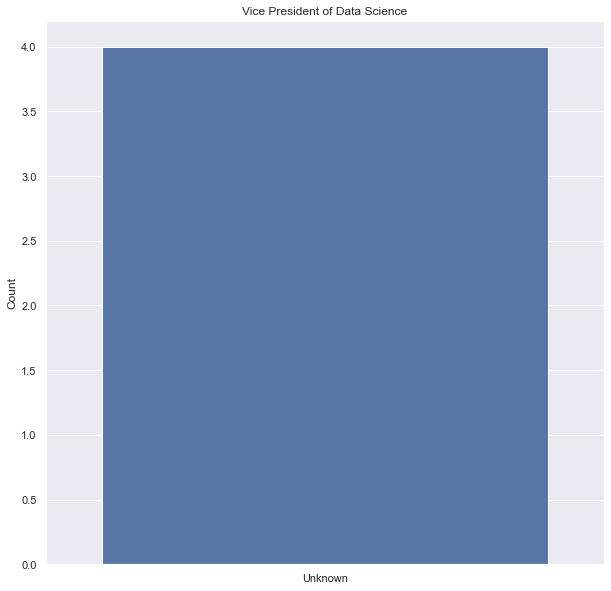

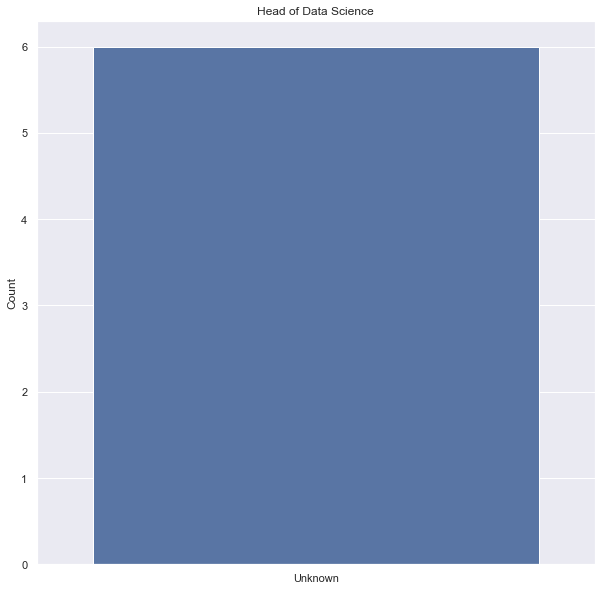

In [128]:
for i in df_1.Title.unique():
    plt.figure(figsize=(10, 10))
    plt.title('{}'.format(i))
    sns.barplot(x = df_1[df_1.Title==i]['Levels'].value_counts().index, y = df_1[df_1.Title==i]['Levels'].value_counts().values)
    plt.ylabel('Count')
    plt.show()

In [129]:
sorted_index_descent = df_1.groupby(['Title']).mean().sort_values(by= 'Salary',ascending=False).index

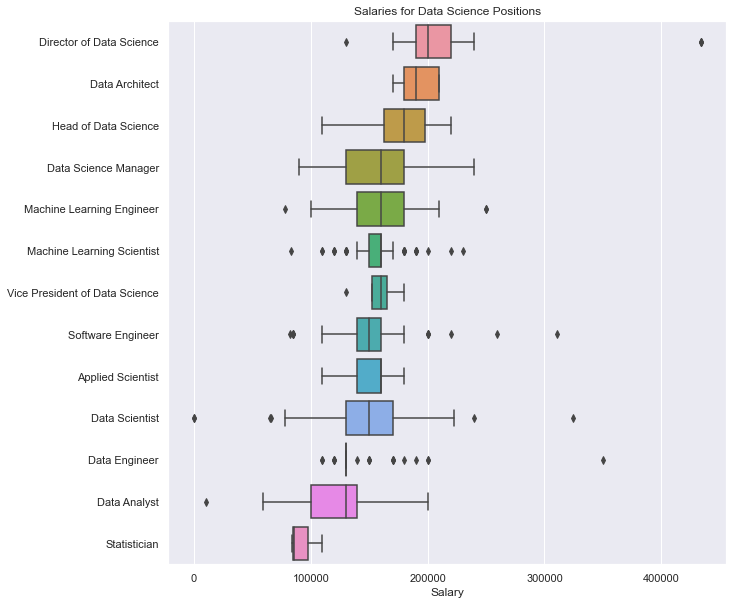

In [130]:
plt.figure(figsize=(10, 10))
sns.boxplot(y=df_1['Title'], x=df_1['Salary'],order=sorted_index_descent)
plt.ylabel('')
plt.title('Salaries for Data Science Positions')
plt.show()

In [131]:
sorted_index_descent = df_1.groupby(['Levels']).median().sort_values(by= 'Salary',ascending=False).index

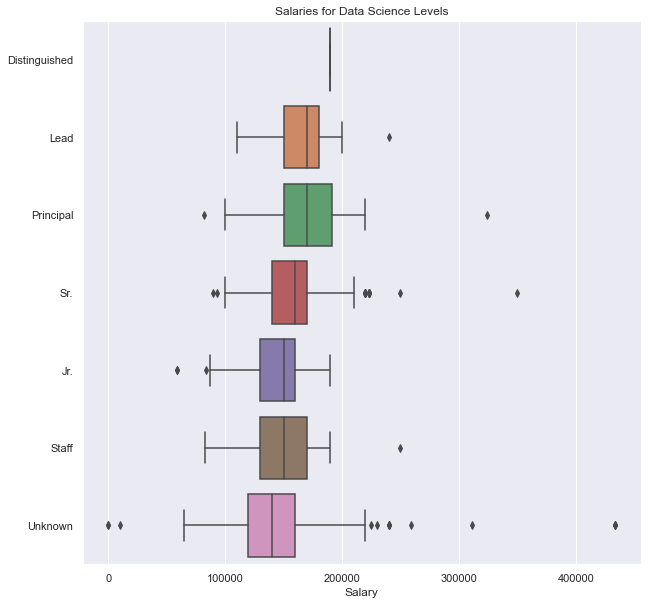

In [132]:
plt.figure(figsize=(10, 10))
sns.boxplot(y=df_1['Levels'], x=df_1['Salary'],order=sorted_index_descent)
plt.ylabel('')
plt.title('Salaries for Data Science Levels')
plt.show()

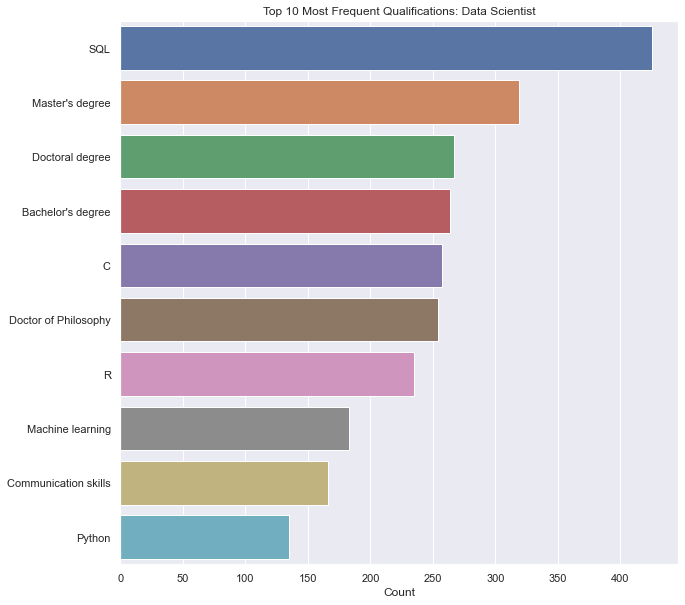

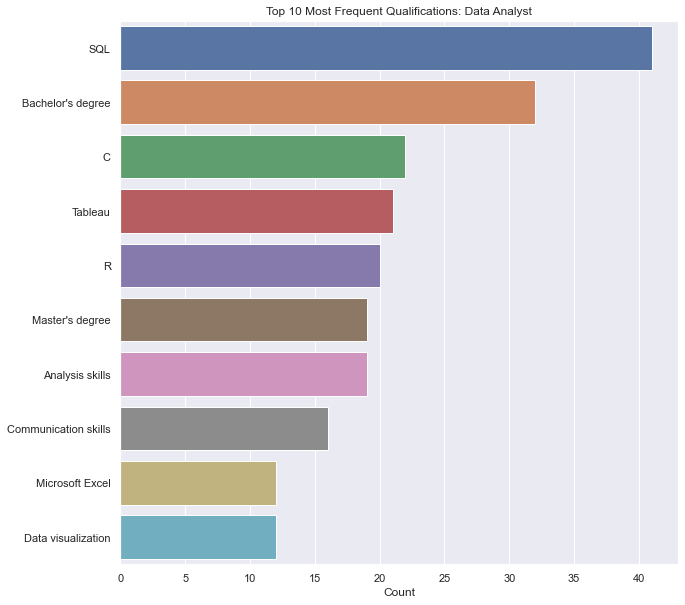

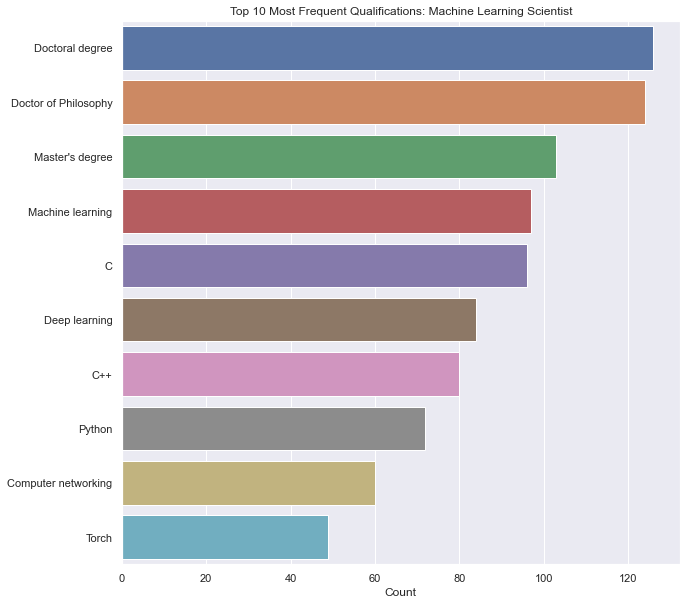

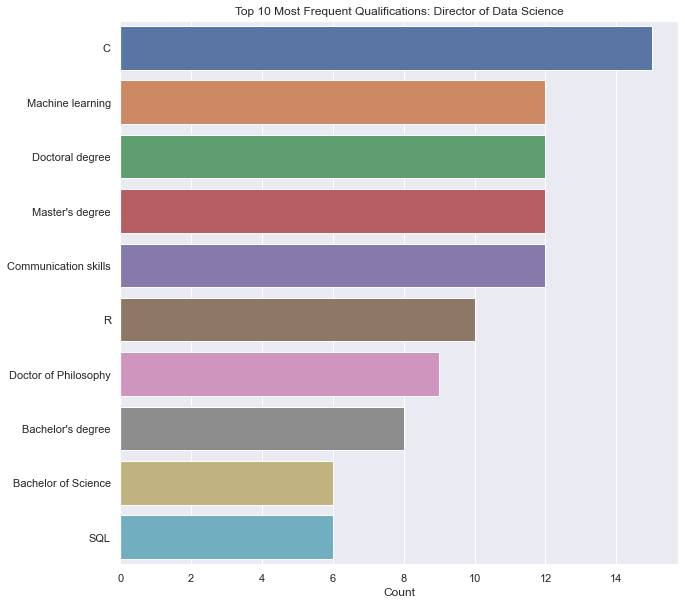

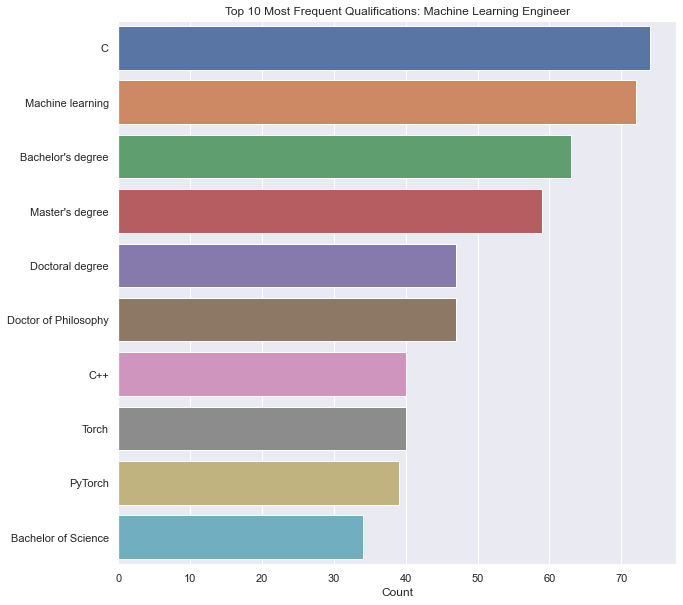

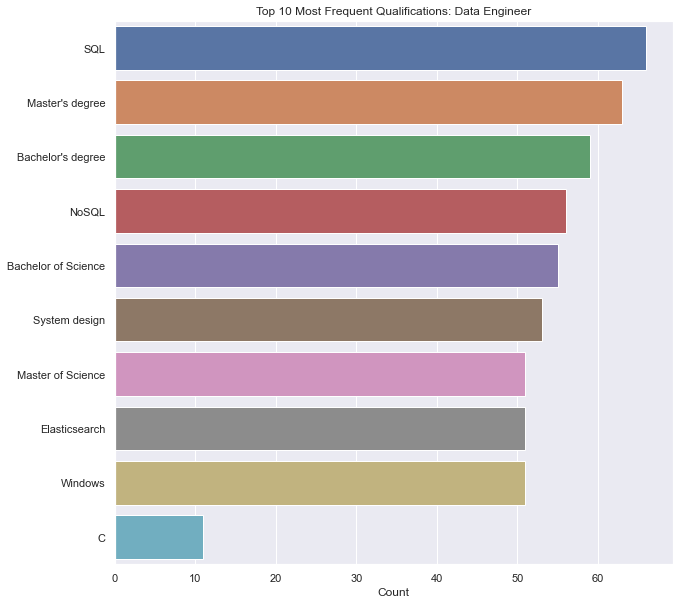

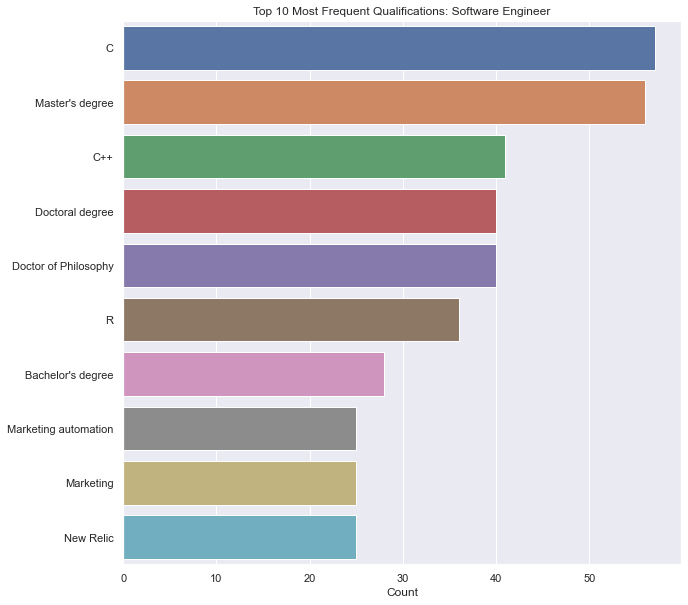

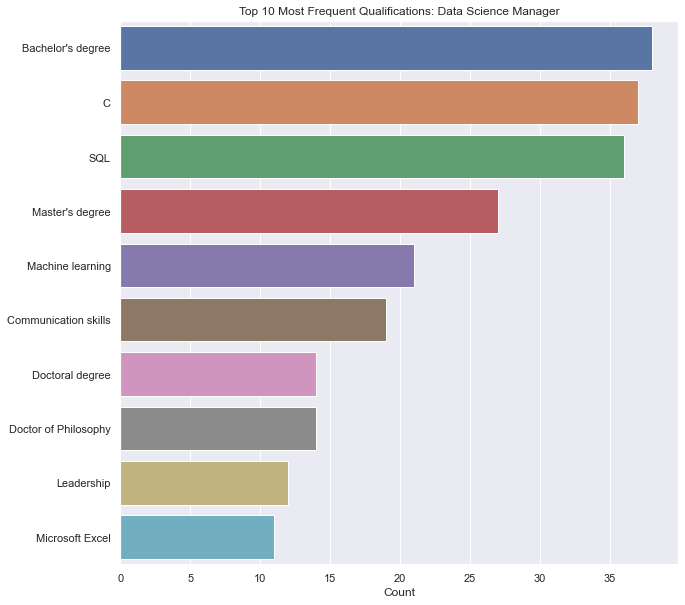

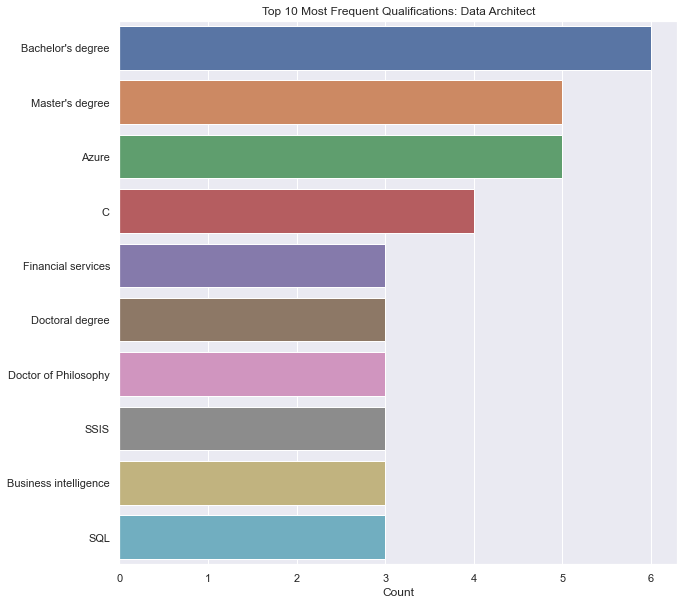

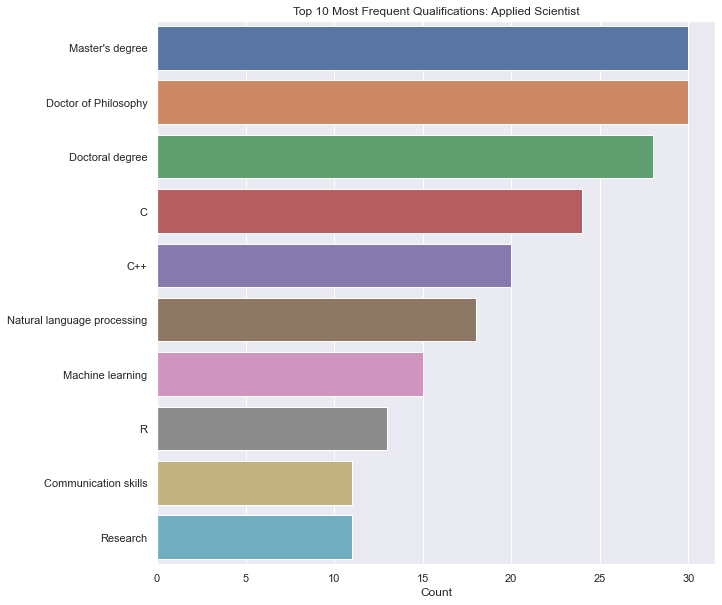

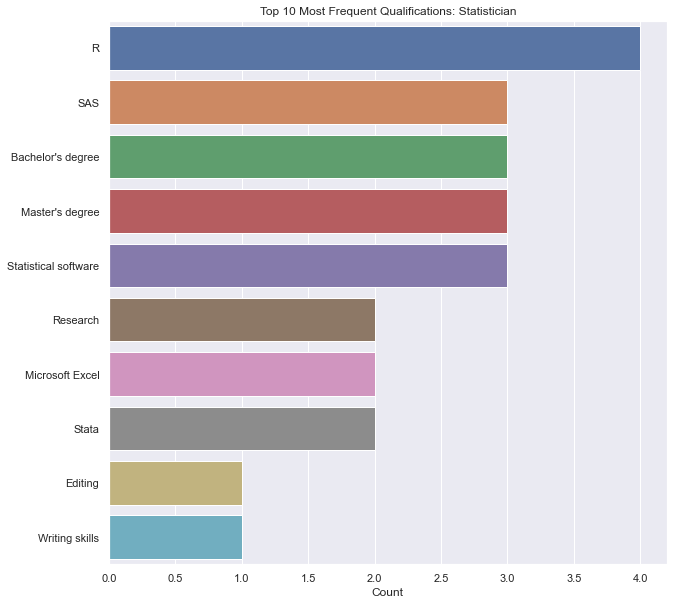

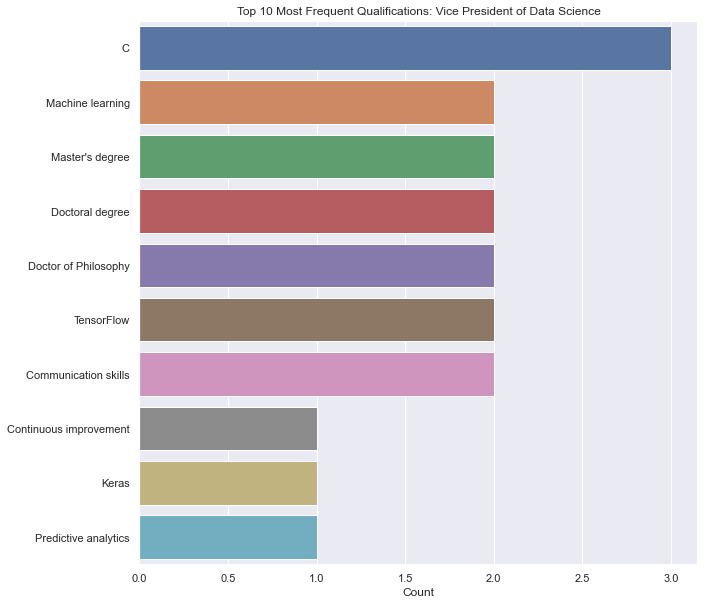

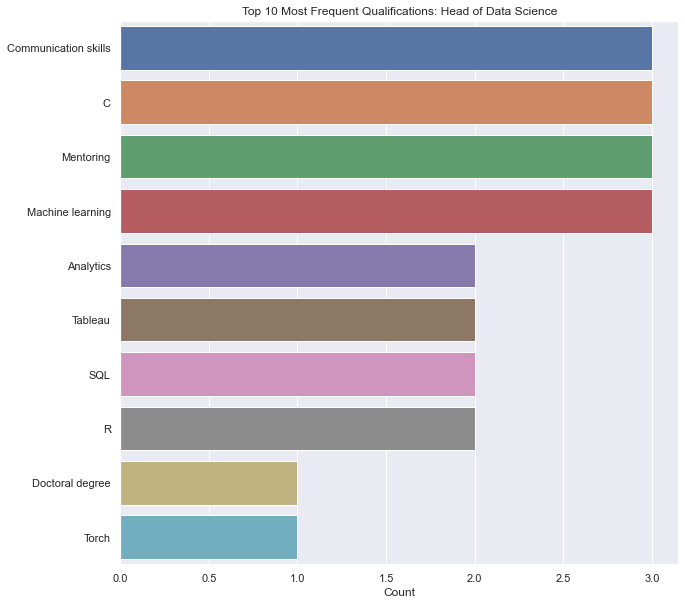

In [133]:
for i in df_1.Title.unique():
    qual_index = df_2.loc[df_1[df_1.Title == i].index, :].sum(axis=0).sort_values(ascending=False).index
    qual_counts = df_2.loc[df_1[df_1.Title == i].index, :].sum(axis=0).sort_values(ascending=False).values
    plt.figure(figsize=(10, 10))
    sns.barplot(y=qual_index[0:10], x=qual_counts[0:10])
    plt.title('Top 10 Most Frequent Qualifications: {}'.format(i))
    plt.xlabel('Count')
    plt.show()

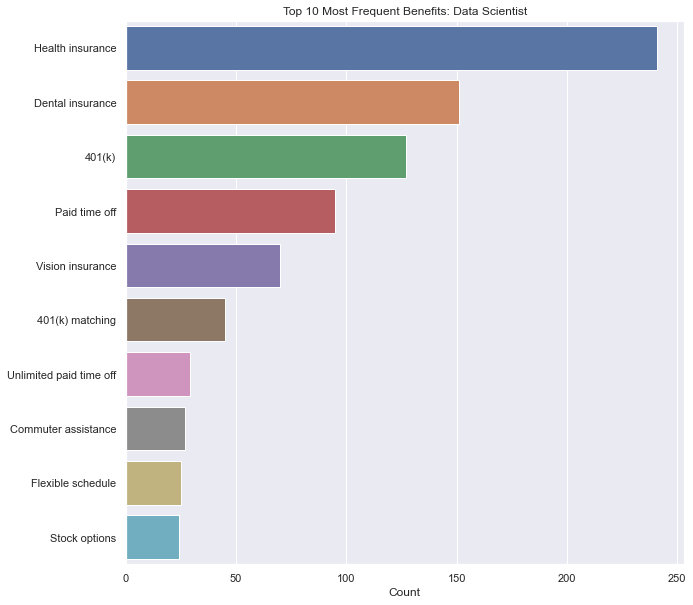

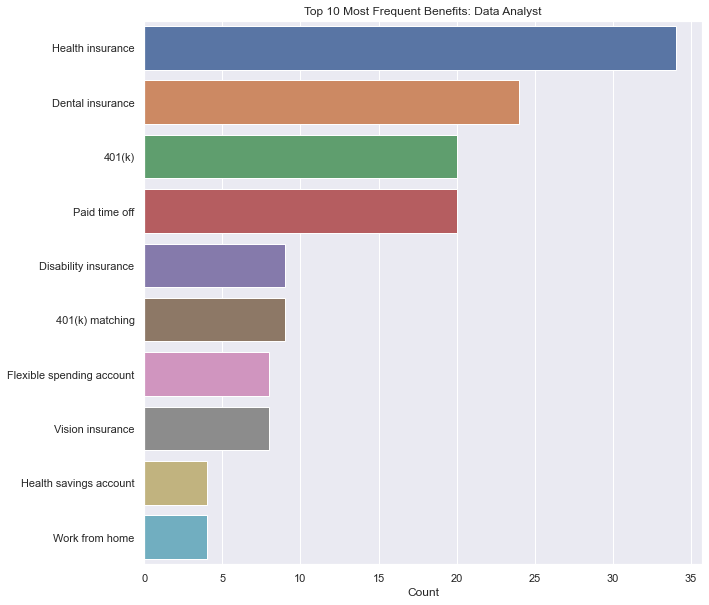

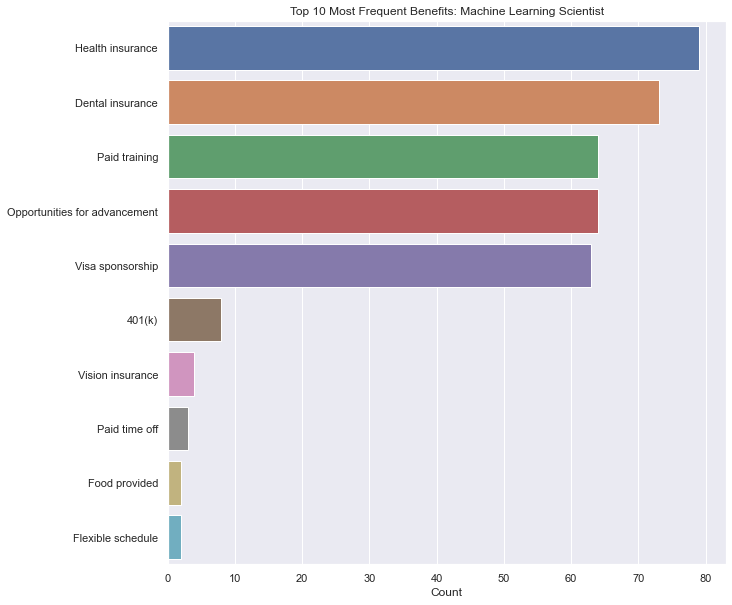

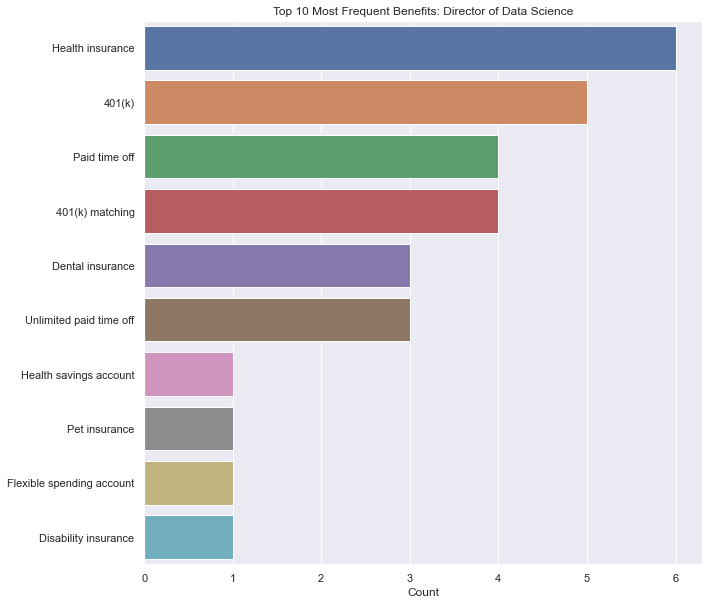

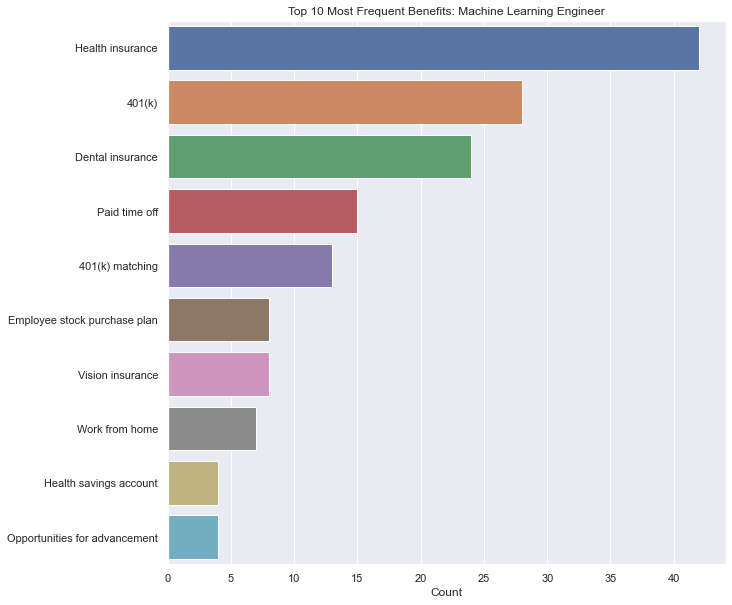

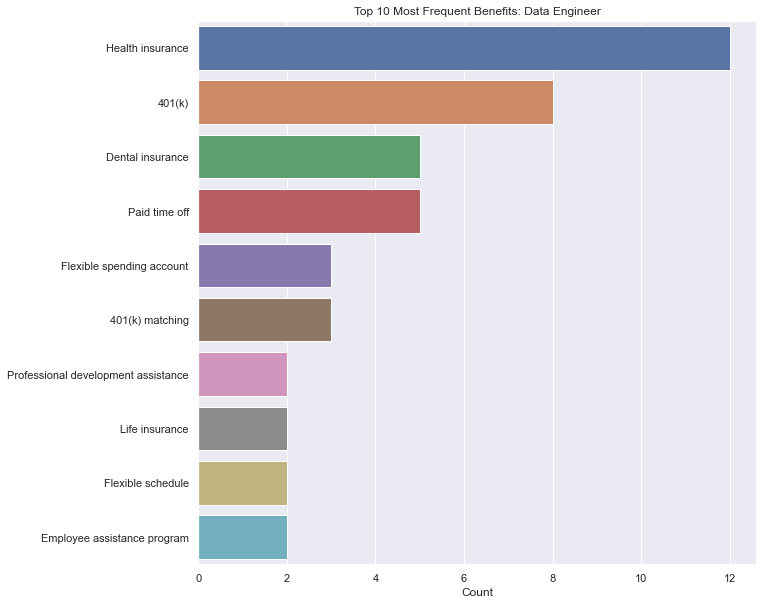

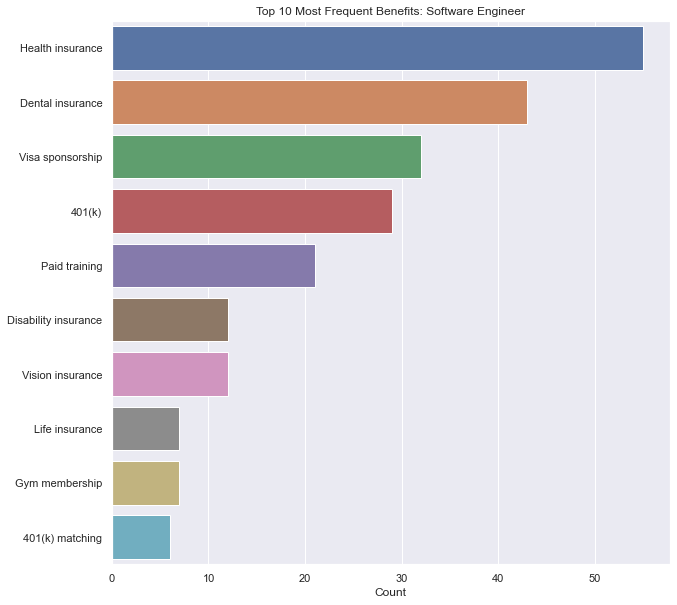

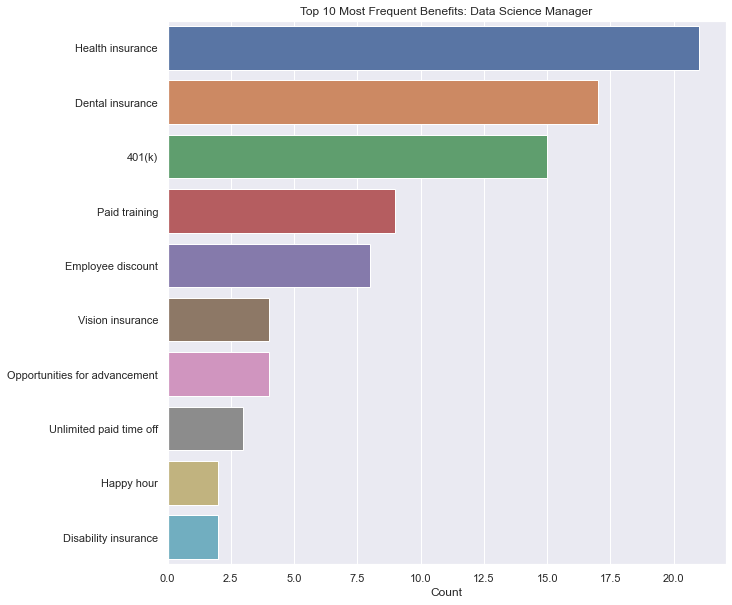

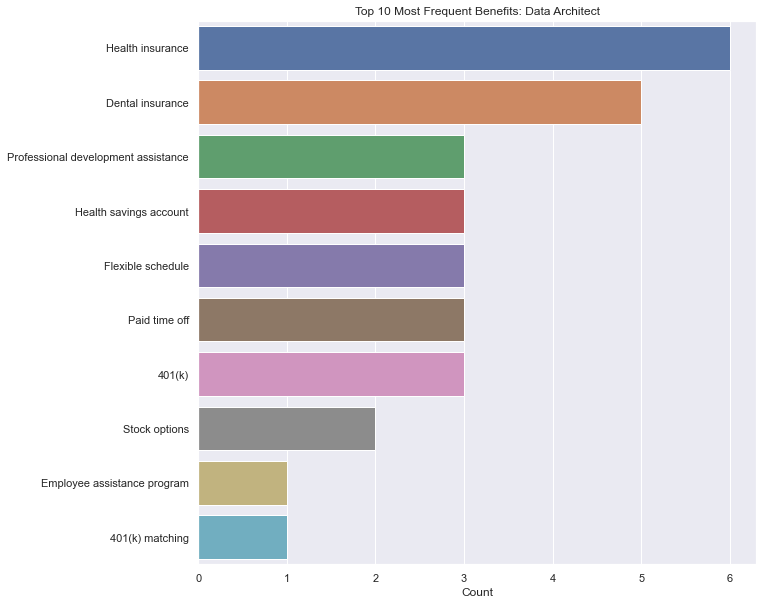

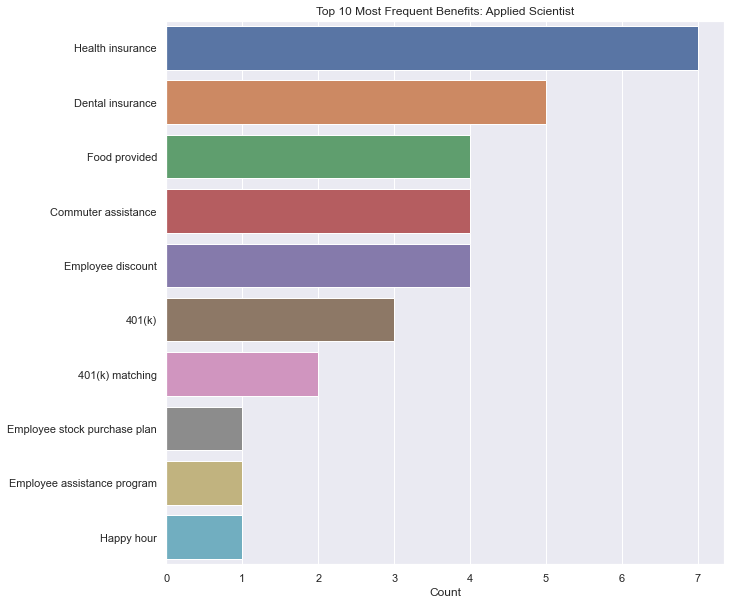

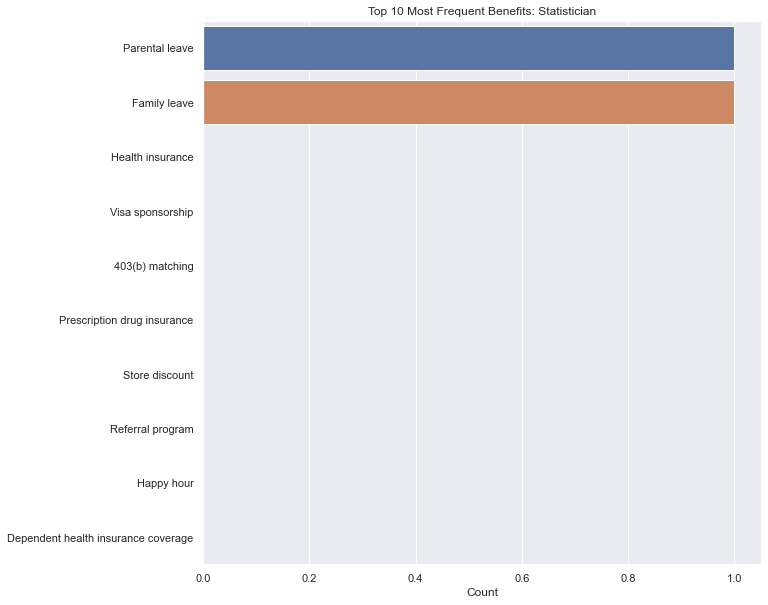

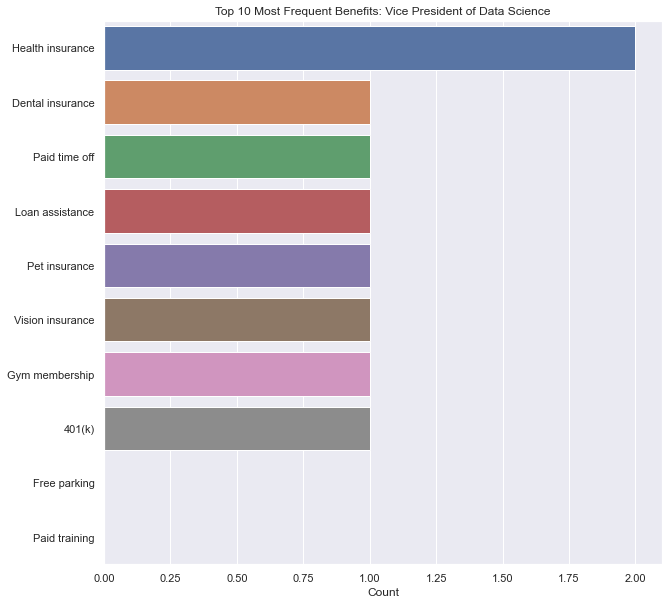

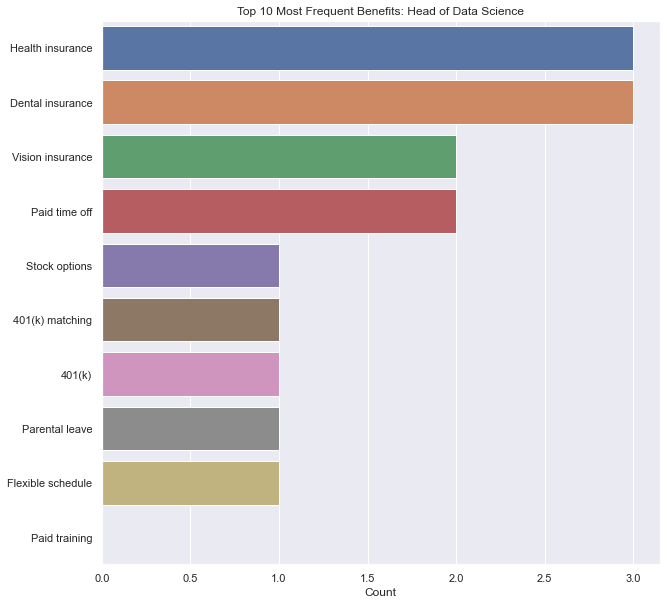

In [134]:
for i in df_1.Title.unique():
    benefits_index = df_3.loc[df_1[df_1.Title == i].index, :].sum(axis=0).sort_values(ascending=False).index
    benefits_counts = df_3.loc[df_1[df_1.Title == i].index, :].sum(axis=0).sort_values(ascending=False).values
    plt.figure(figsize=(10, 10))
    sns.barplot(y=benefits_index[0:10], x=benefits_counts[0:10])
    plt.title('Top 10 Most Frequent Benefits: {}'.format(i))
    plt.xlabel('Count')
    plt.show()

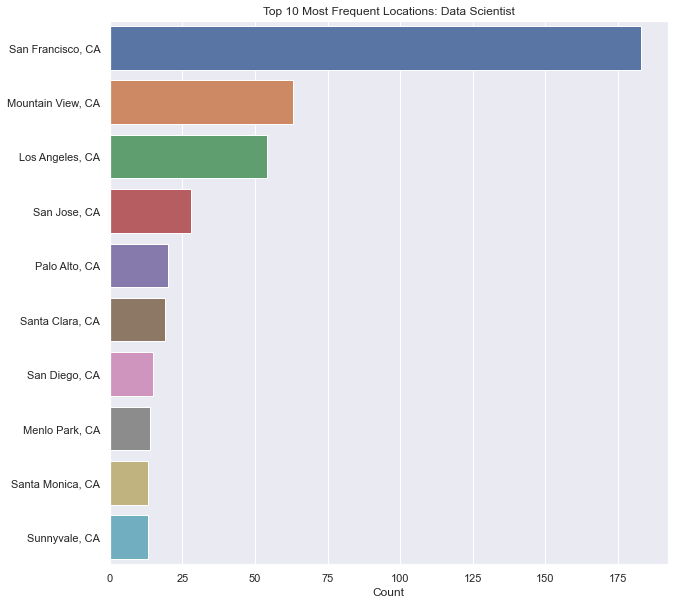

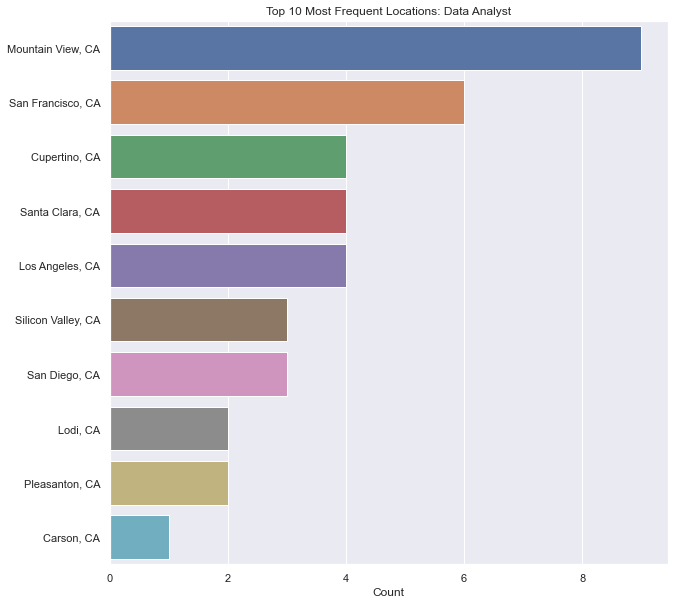

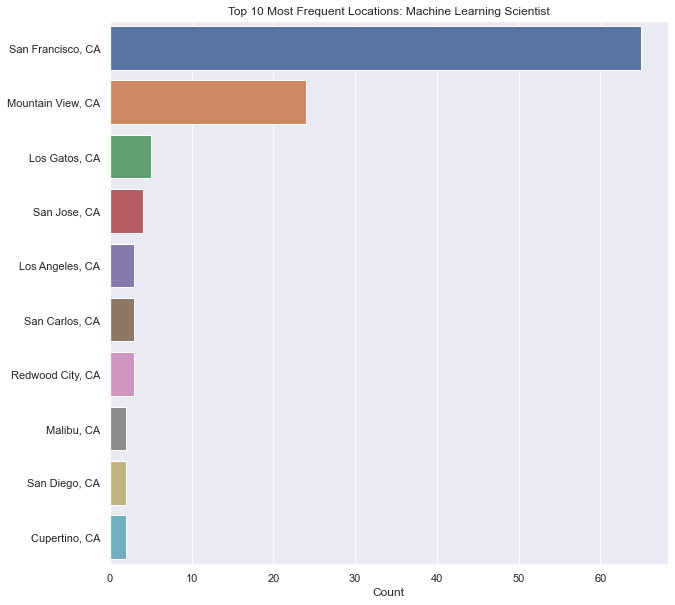

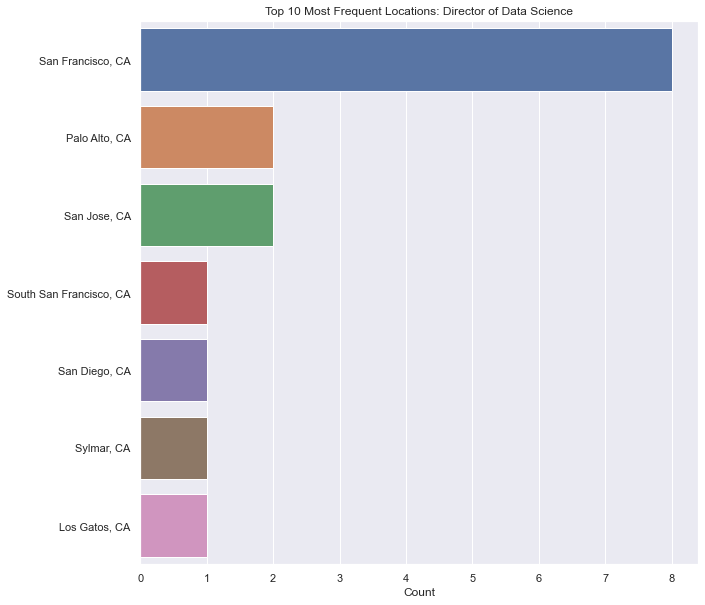

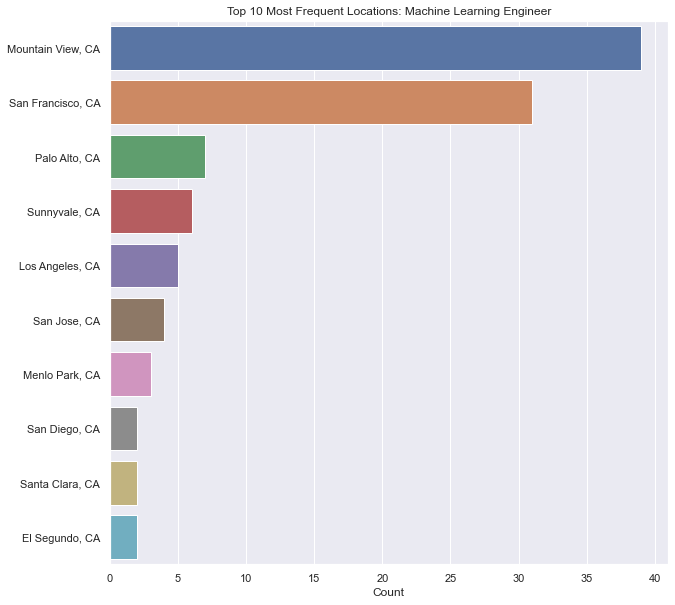

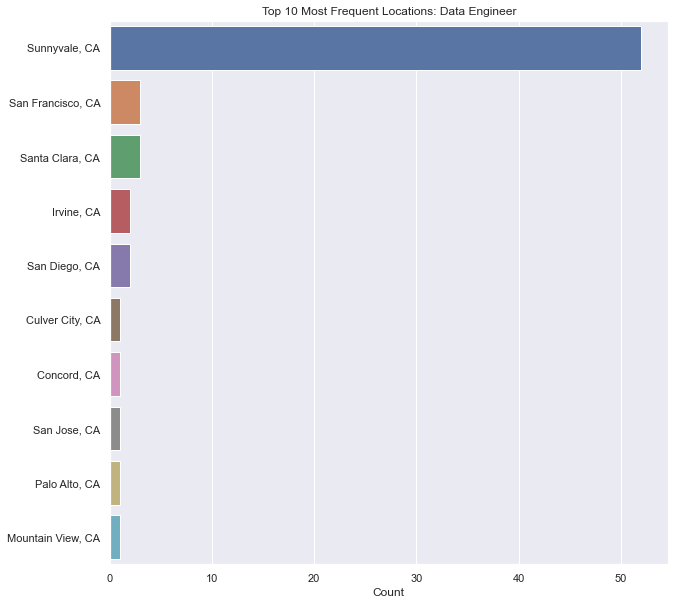

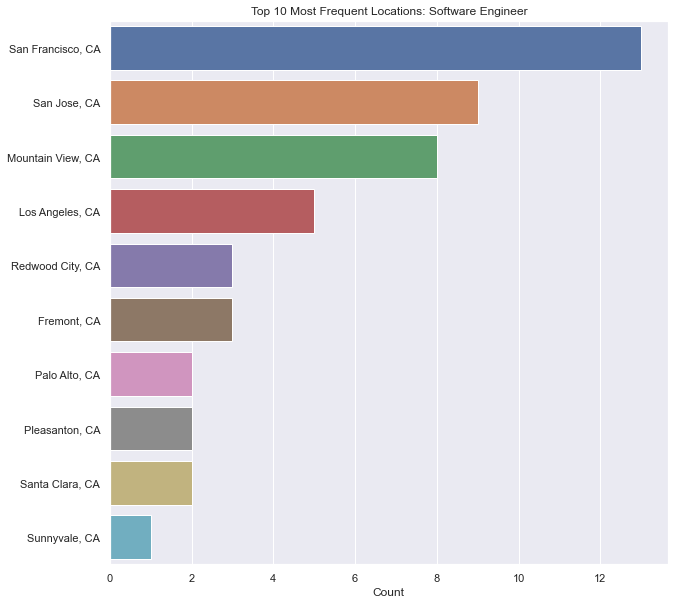

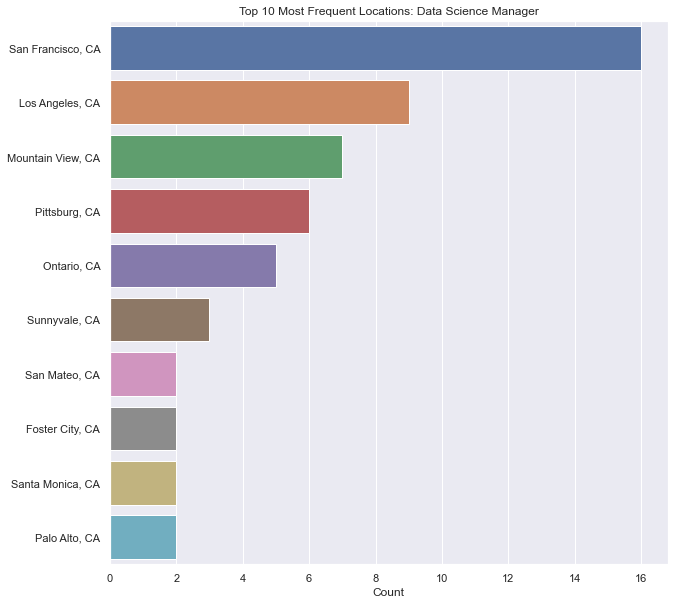

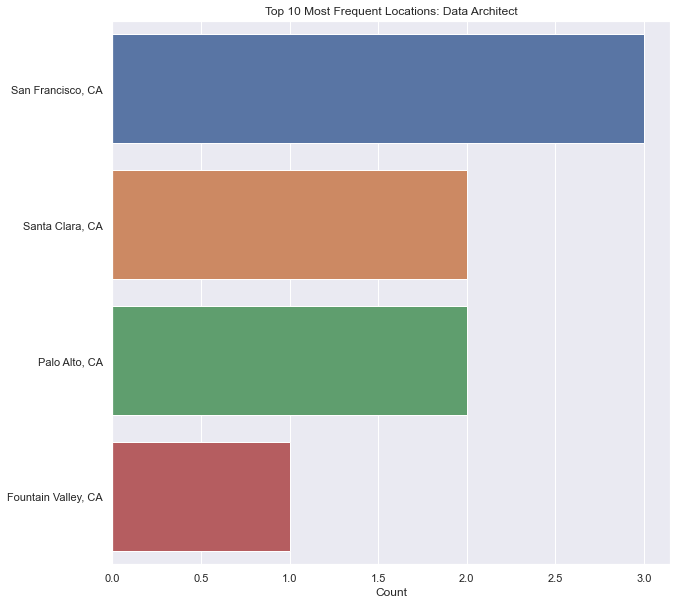

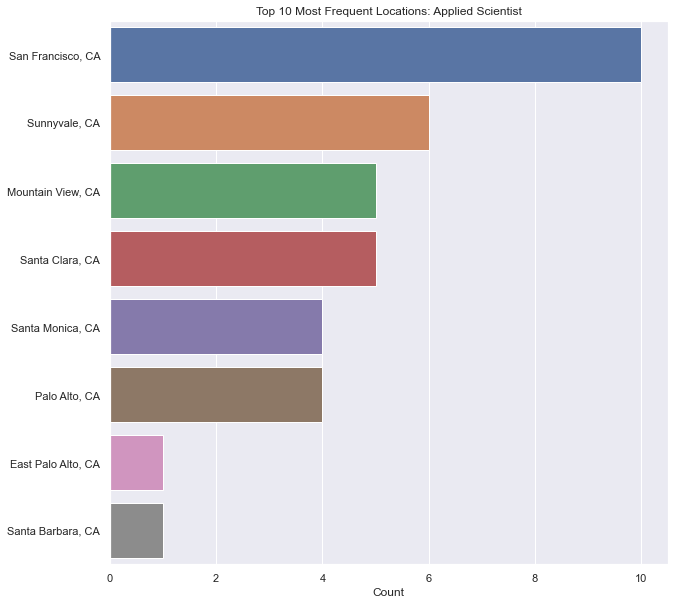

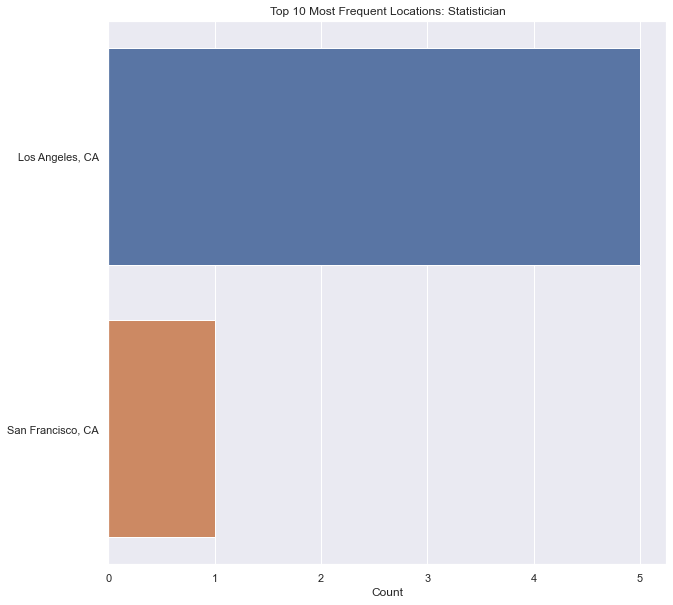

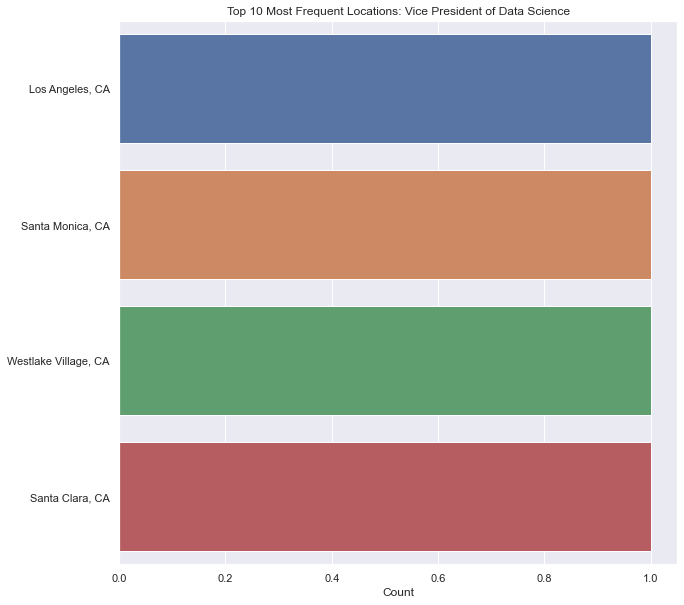

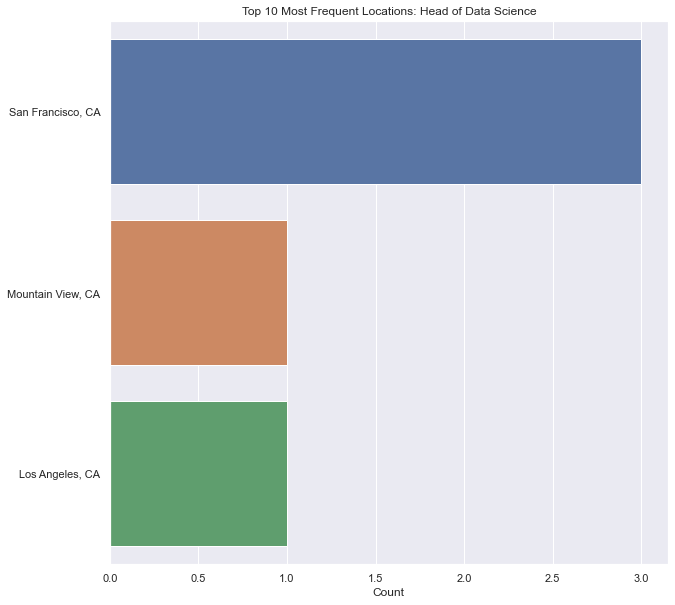

In [135]:
for i in df_1.Title.unique():
    locations_index = df_1[df_1.Title == i]['Location'].value_counts().index
    locations_counts = df_1[df_1.Title == i]['Location'].value_counts().values
    plt.figure(figsize=(10, 10))
    sns.barplot(y=locations_index[0:10], x=locations_counts[0:10])
    plt.title('Top 10 Most Frequent Locations: {}'.format(i))
    plt.xlabel('Count')
    plt.show()

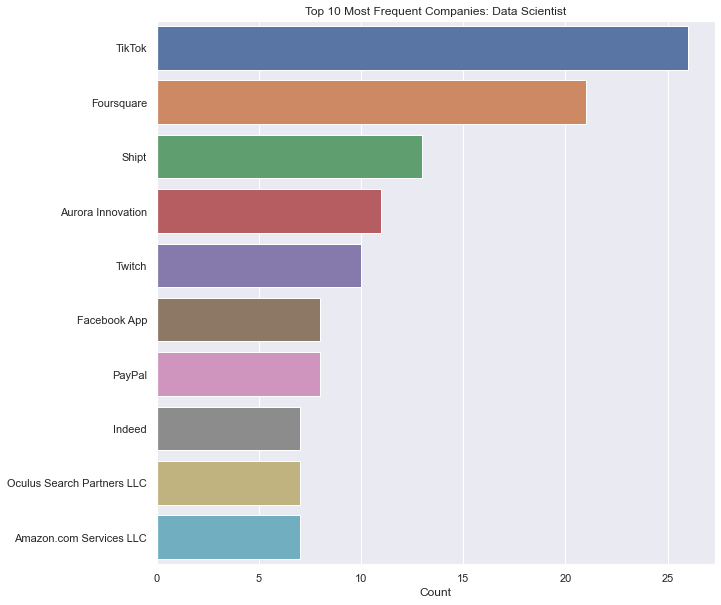

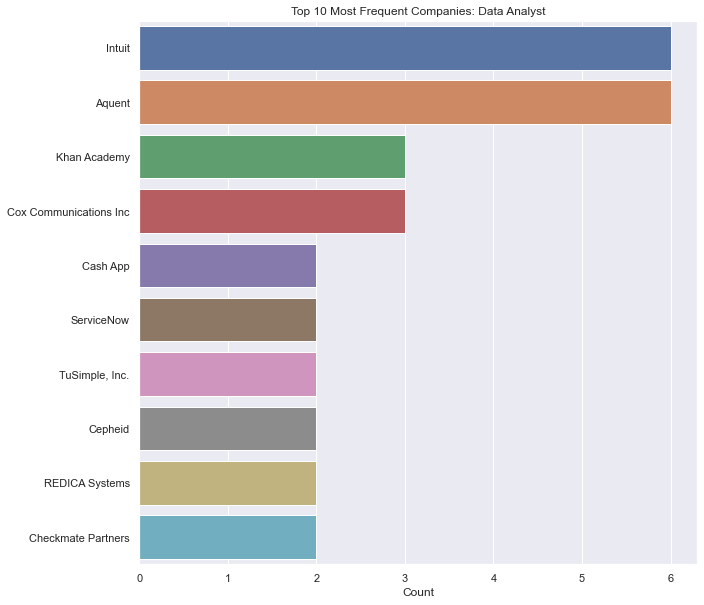

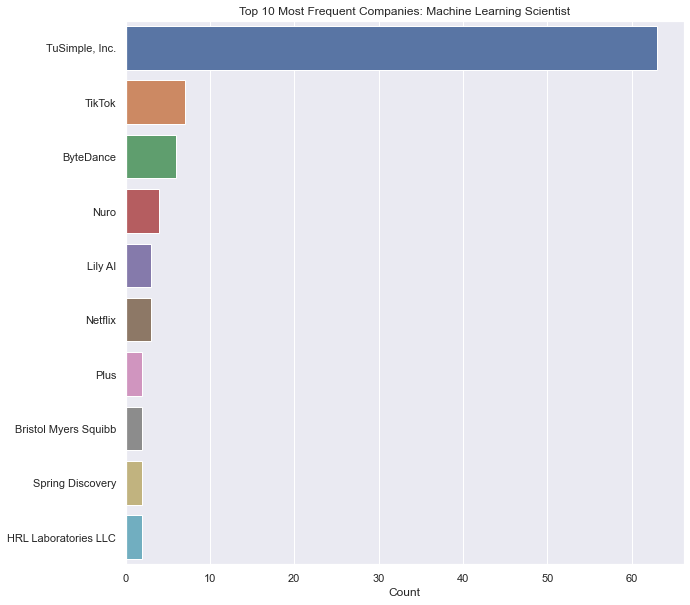

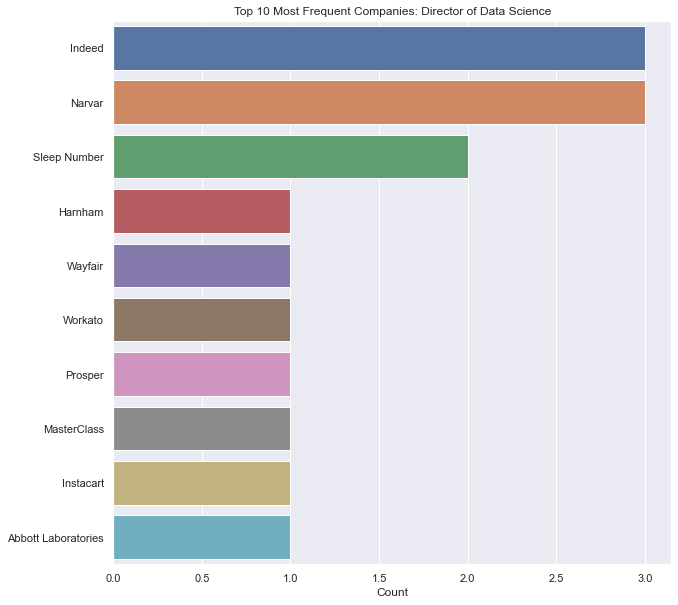

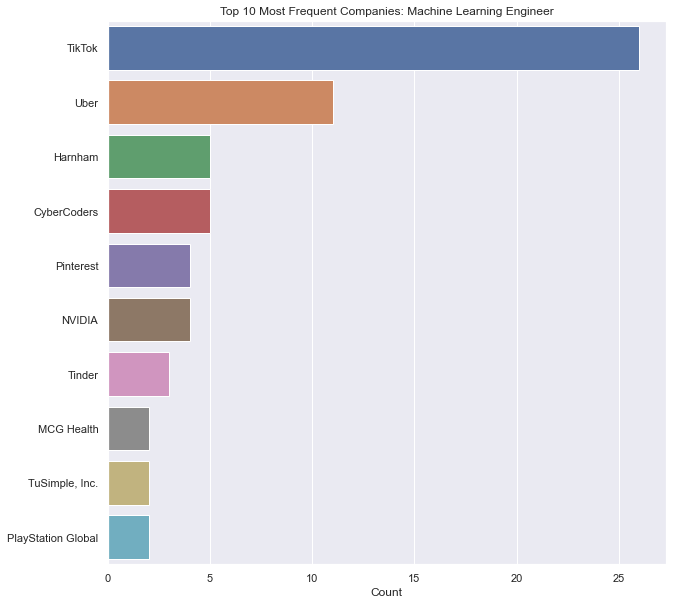

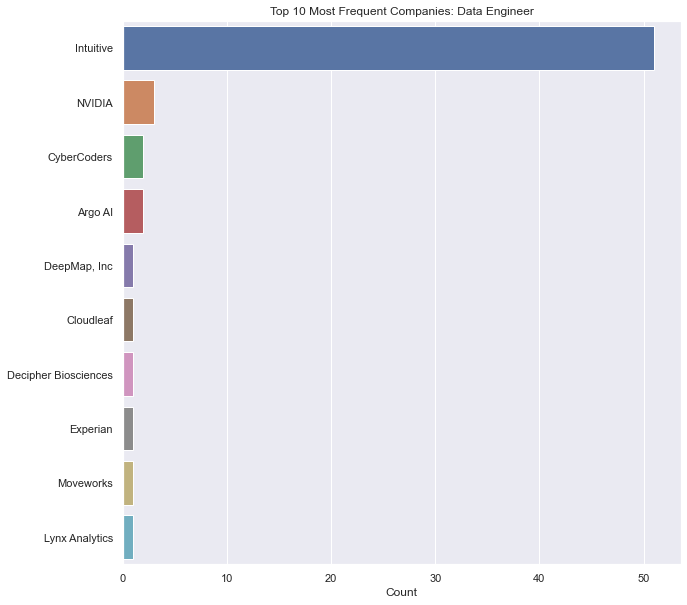

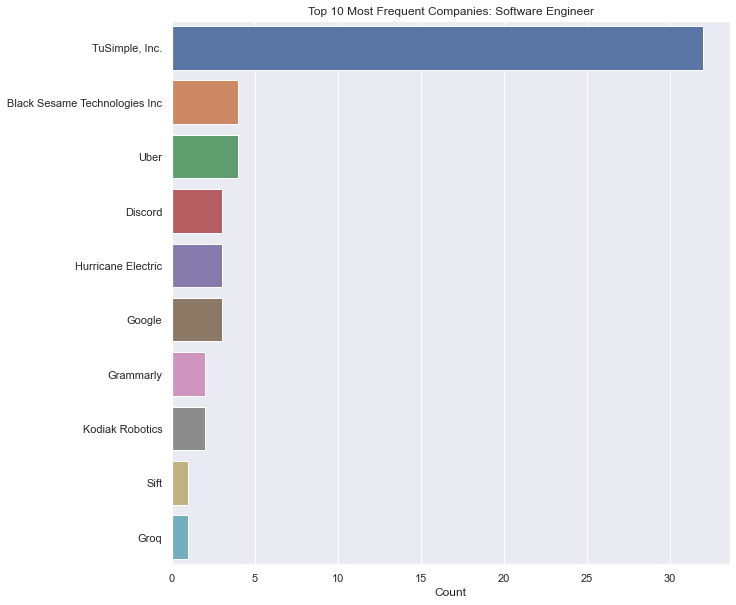

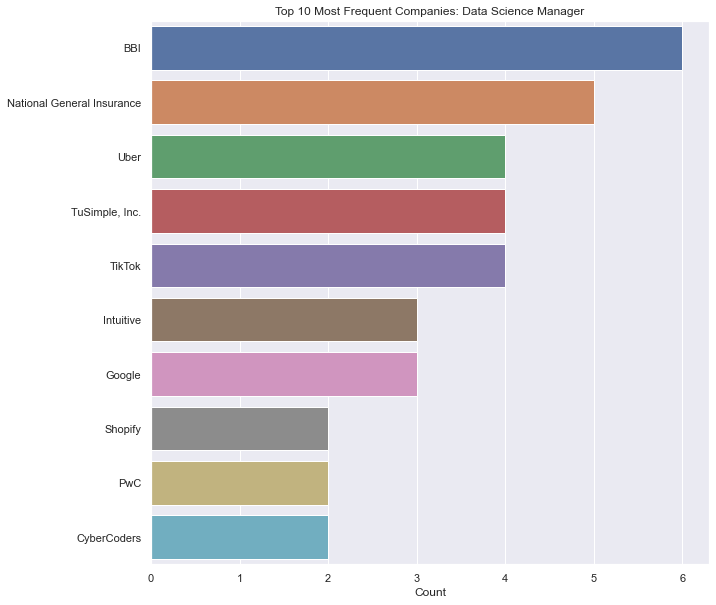

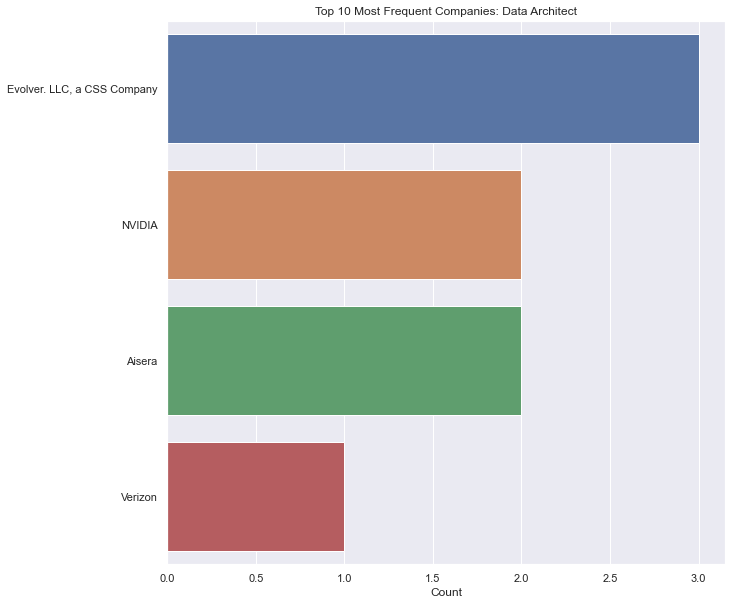

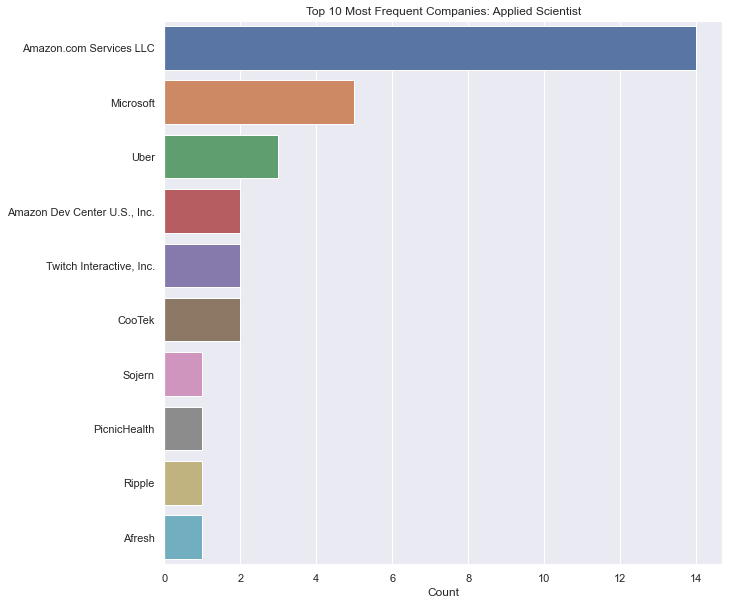

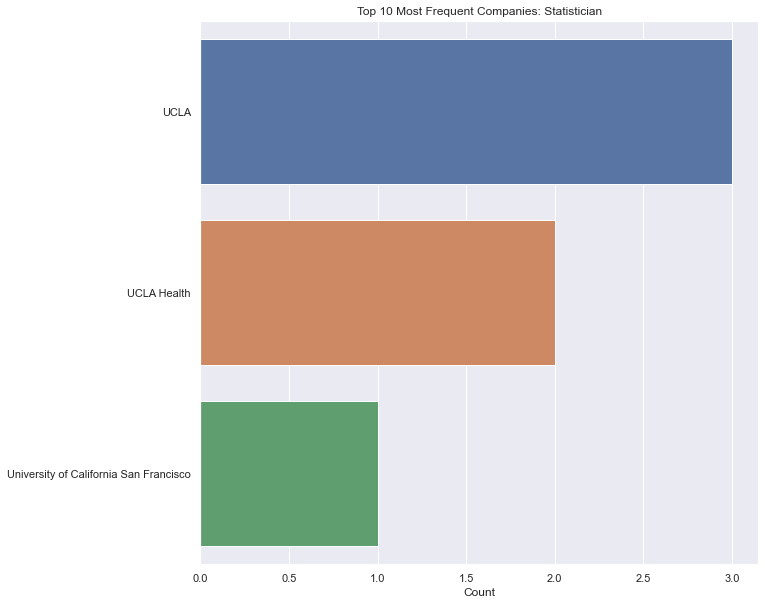

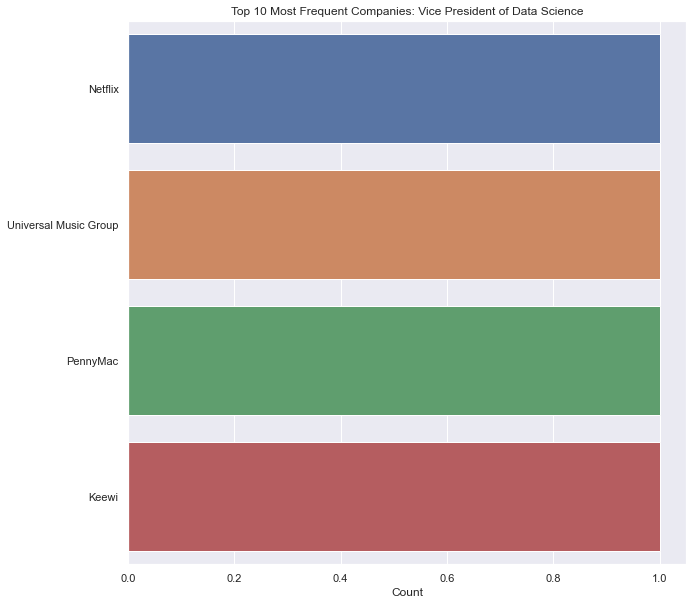

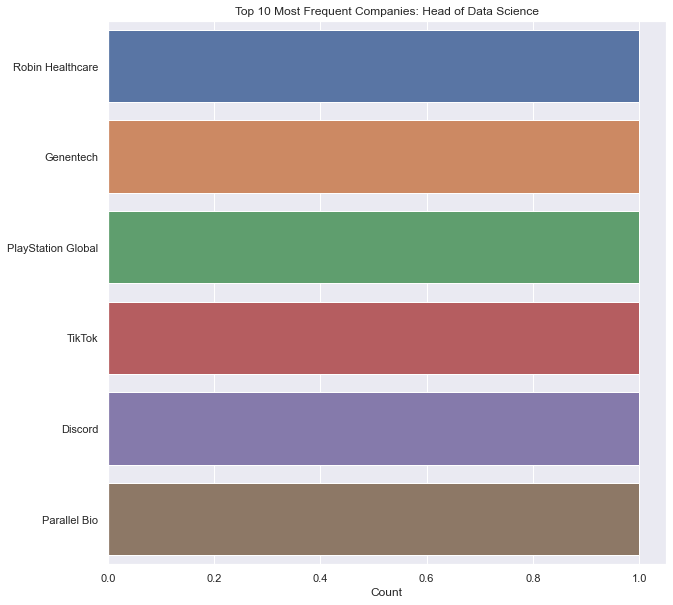

In [136]:
for i in df_1.Title.unique():
    company_index = df_1[df_1.Title == i]['Company'].value_counts().index
    company_counts = df_1[df_1.Title == i]['Company'].value_counts().values
    plt.figure(figsize=(10, 10))
    sns.barplot(y=company_index[0:10], x=company_counts[0:10])
    plt.title('Top 10 Most Frequent Companies: {}'.format(i))
    plt.xlabel('Count')
    plt.show()

# 5. Load data for OLS analysis

In [137]:
#CSVs from data_cleaning.py
df_modeling_drop_first = pd.read_csv('data_cleaning/df_modeling_drop_first.csv')
dropped_columns = pd.read_csv('data_cleaning/dropped_columns.csv')

In [138]:
df_modeling_drop_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Columns: 988 entries, Unnamed: 0 to Levels_Unknown
dtypes: float64(363), int64(625)
memory usage: 9.7 MB


In [139]:
df_modeling_drop_first.head()

,Unnamed: 0,Salary,Analysis skills,Communication skills,Research,R,Machine learning,Bachelor's degree,Master's degree,Doctoral degree,...,"Location_West Hollywood, CA","Location_West Sacramento, CA","Location_Westlake Village, CA","Location_Woodland Hills, CA",Levels_Jr.,Levels_Lead,Levels_Principal,Levels_Sr.,Levels_Staff,Levels_Unknown
0,0,110000.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0
1,1,120000.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2,150000.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,3,150000.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,4,130000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0


In [140]:
dropped_columns

,Unnamed: 0,0
0,0,Company_23andMe
1,1,Title_Applied Scientist
2,2,Levels_Distinguished
3,3,"Location_Alameda, CA"


# 6. OLS data cleaning

In [141]:
df_modeling_drop_first = df_modeling_drop_first.drop('Unnamed: 0', axis=1)
dropped_columns = dropped_columns.drop('Unnamed: 0', axis=1)

In [142]:
for i in df_modeling_drop_first.columns[1:]:
    df_modeling_drop_first.loc[:,i] = df_modeling_drop_first.loc[:,i].astype('Int64')

In [143]:
X_drop_first = df_modeling_drop_first.copy()
y = X_drop_first.pop('Salary')

In [144]:
X_drop_first.shape

(1287, 986)

# 7. OLS analysis

With 986 predictors, using an alpha value of 0.05 will result in about 49 type I errors. Therefore, use a multiple testing technique to determine a more conservative alpha value to reduce the number of type I errors.

In [145]:
X_sm = sm.add_constant(X_drop_first)
model = sm.OLS(y.astype(float),X_sm.astype(int))
results = model.fit()
results.summary()

C:\Users\malex\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     14.44
Date:                Thu, 23 Dec 2021   Prob (F-statistic):          1.63e-161
Time:                        12:34:54   Log-Likelihood:                -13127.
No. Observations:                1287   AIC:                         2.787e+04
Df Residuals:                     480   BIC:                         3.203e+04
Df Model:                         806                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                             1.721e+05   2.59e+04      6.650      0.000    1.21e+05    2.23e+05
Analysis skills                                                   1568.1528   3150.382      0.498      0.619   -4622.092    7758.397
Communication skills                                              1687.3015   4193.280      0.402      0.688   -6552.152    9926.755
Research                                                         -7264.7381   4040.328     -1.798      0.073   -1.52e+04     674.177
R                                                                -1115.9204   2956.543     -0.377      0.706   -6925.286    4693.445
Machine learning                                                 -1701.4333   2942.585     -0.578      0.563   -7483.372    4080.506
Bachelor's degree                                                -4203.0410   2530.474     -1.661      0.097   -9175.217     769.135
Master's degree                                                   5423.6759   2445.846      2.218      0.027     617.788    1.02e+04
Doctoral degree                                                  -1.154e+04   6766.282     -1.706      0.089   -2.48e+04    1752.196
Doctor of Philosophy                                              2.452e+04   7368.802      3.327      0.001       1e+04     3.9e+04
Power BI                                                          3147.2365   6989.562      0.450      0.653   -1.06e+04    1.69e+04
Relational databases                                             -1.093e+04   6961.624     -1.570      0.117   -2.46e+04    2750.452
Manufacturing                                                     4663.0619   8290.597      0.562      0.574   -1.16e+04     2.1e+04
Microsoft Excel                                                  -8833.6073   6155.664     -1.435      0.152   -2.09e+04    3261.770
Molecular biology                                                -4.811e+04   2.37e+04     -2.032      0.043   -9.46e+04   -1585.793
Product management                                               -1376.1135   5101.609     -0.270      0.787   -1.14e+04    8648.133
Usability                                                        -2.876e+04   1.74e+04     -1.656      0.098   -6.29e+04    5356.171
Natural language processing                                      -5739.1037   3278.657     -1.750      0.081   -1.22e+04     703.191
Python                                                            2326.1333   2833.827      0.821      0.412   -3242.106    7894.373
SQL                                                              -4983.2880   3546.286     -1.405      0.161    -1.2e+04    1984.874
ICD coding              

In [146]:
p_set = results.pvalues.values[1:]

reject, p_corrected, alphac_sidak, alphac_bonf = multipletests(pvals=p_set,
                                                               method='bonferroni',
                                                               alpha=0.05, 
                                                               is_sorted=False,
                                                               returnsorted=False)

print('Total number of hypothesis tests:', len(p_set))
print('Number of null hypotheses rejected at alpha = 0.05:', sum(results.pvalues.values < 0.05))
print('Number of null hypotheses rejected with adj. alpha with Bonferroni method:', sum(reject))
# print('Adjusted p-val corresponding to the original p-val set :','\n', p_corrected,'\n')
# print('Adj. alpha value after FWER correction by Sidak method:', alphac_sidak)
print('Adj. alpha value after FWER correction by Bonferroni method:', alphac_bonf)

Total number of hypothesis tests: 986
Number of null hypotheses rejected at alpha = 0.05: 372
Number of null hypotheses rejected with adj. alpha with Bonferroni method: 46
Adj. alpha value after FWER correction by Bonferroni method: 5.070993914807303e-05


In [147]:
print('Variables with a rejected null hypothesis using Bonferroni method:')
for i in results.pvalues.index[1:][reject]:
    print(i)

Variables with a rejected null hypothesis using Bonferroni method:
Statistical analysis
Writing skills
Shell Scripting
Unit testing
Keras
Pre-employment physical examination
Adobe Photoshop
Linux
Cleaning
Docker
Ontology
Scripting
SSIS
Bank Secrecy Act
Cognos
Backbone.js
Project management methodology
Google Cloud Platform
Title_Data Architect
Title_Data Science Manager
Title_Director of Data Science
Title_Machine Learning Engineer
Title_Software Engineer
Company_AiCard
Company_BBI
Company_CalPrivate Bank
Company_Circle
Company_Convex Tech
Company_CooTek
Company_E. & J. Gallo Winery
Company_Evolver. LLC, a CSS Company
Company_Gayathri's Sandbox
Company_Grammarly
Company_Hurricane Electric
Company_Invitae
Company_LivePerson
Company_Sojern
Company_Spotline Inc
Company_TargetCW
Company_Teknatio
Company_Vivun
Company_Warman O'Brien
Company_iMerit
Location_Burlingame, CA
Location_Oakland, CA
Location_Pittsburg, CA


In [148]:
order = results.pvalues.index[1:][reject][pd.DataFrame(results.params.values[1:][reject]).sort_values(by=0, ascending=False).index]

In [149]:
dropped_columns

,0
0,Company_23andMe
1,Title_Applied Scientist
2,Levels_Distinguished
3,"Location_Alameda, CA"


In [150]:
#modified from: https://stackoverflow.com/a/56780852
def show_values_on_bars(axs, h_v="v", space=0.5):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                if p.get_x() + p.get_width() > 0:
                    _x = p.get_x() + p.get_width() + float(space)
                elif p.get_x() + p.get_width() < 0:
                    _x = p.get_x() + p.get_width() - float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                if p.get_x() + p.get_width() > 0:
                    ax.text(_x, _y, value, ha="left")
                elif p.get_x() + p.get_width() < 0:
                    ax.text(_x, _y, value, ha="right")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

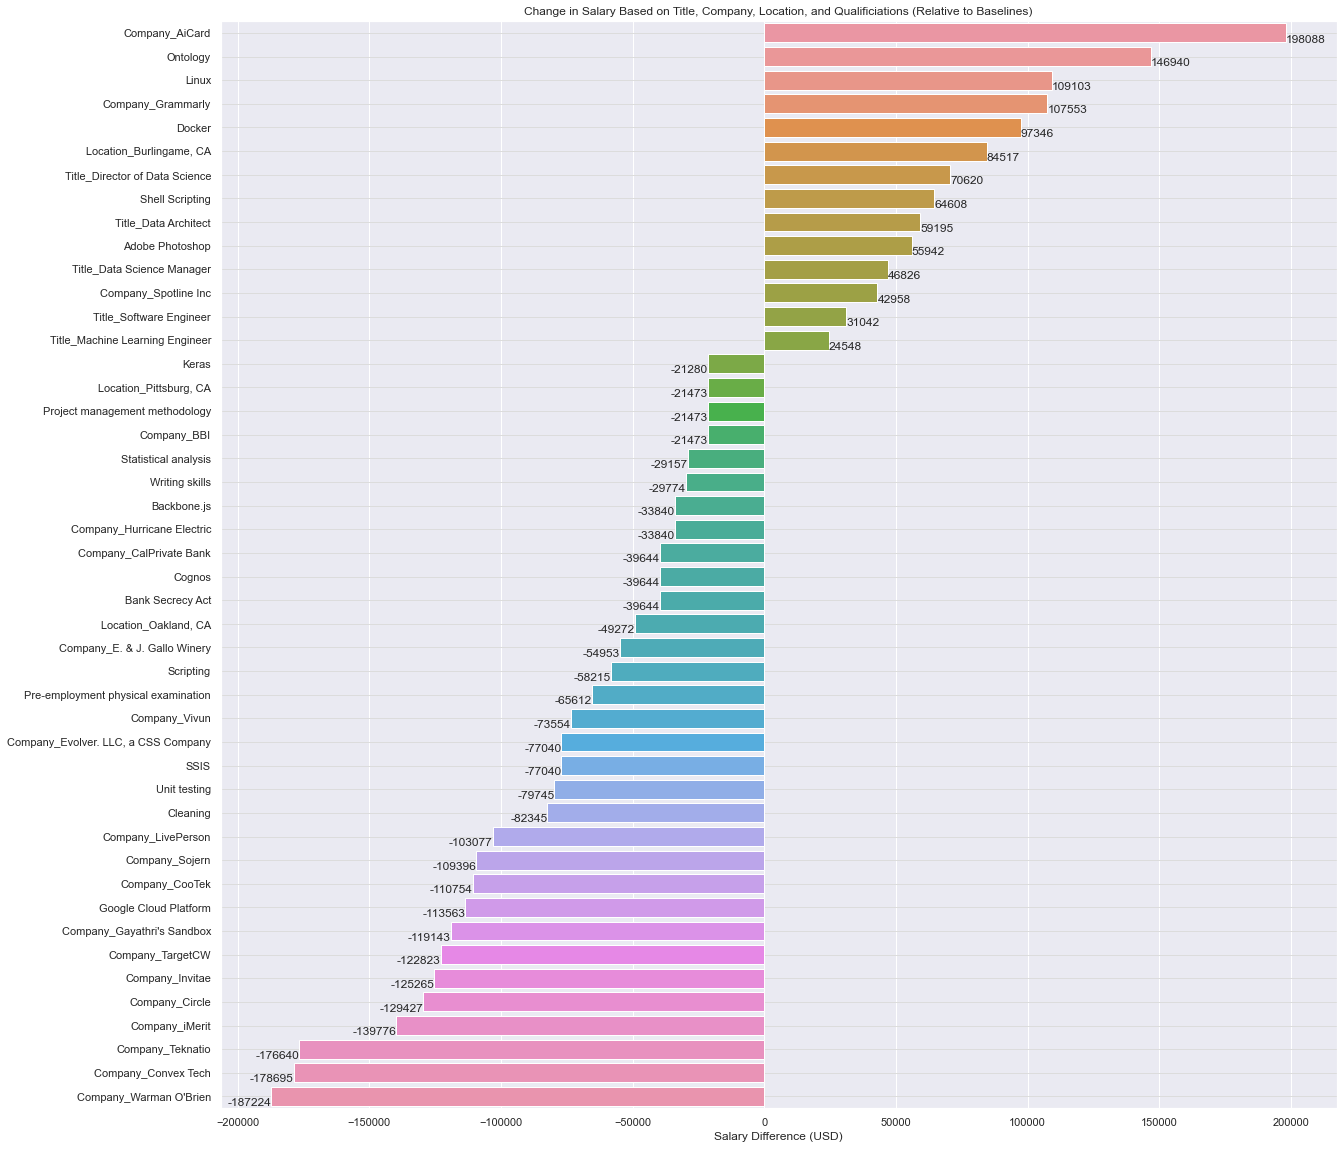

In [151]:
plt.figure(figsize=(20, 20))
bp = sns.barplot(y=results.pvalues.index[1:][reject],x=results.params.values[1:][reject], order = order)
bp.set_axisbelow(True)
bp.yaxis.grid(color='gainsboro', linestyle='solid')
plt.xlabel('Salary Difference (USD)')
plt.title('Change in Salary Based on Title, Company, Location, and Qualificiations (Relative to Baselines)')
show_values_on_bars(bp, "h", 1)

In [152]:
company = 0
title = 0
location = 0
levels = 0
qualifications = 0
for i in results.pvalues.index[1:][reject]:
    if 'Company' in i:
        company += 1
    elif 'Title' in i:
        title += 1
    elif 'Location' in i:
        location += 1
    elif 'Levels' in i:
        levels += 1
    else:
        qualifications += 1

print('Statistically significant predictors count:')        
print('Company: {}'.format(company))
print('Qualifications: {}'.format(qualifications))
print('Title: {}'.format(title))
print('Location: {}'.format(location))
print('Levels: {}'.format(levels))

Statistically significant predictors count:
Company: 20
Qualifications: 18
Title: 5
Location: 3
Levels: 0


Level predictors do not have a p-value that indicate statistical significance in predicting salary across California, because other predictors have a larger impact (i.e., company, location, and title). For instance, a senior level data scientist position in San Bernadino, CA and a senior level data scientist position in San Francisco, CA will have a large difference in salary regardless of seniority. Therefore, levels are not a useful metric for predicting salary across all of California. If a model were built on a specific location in California then it is more likely to be statistically significant.

Below is an OLS analysis using only the Levels predictor. Only 6.5% of the variation in Salary is explained by the Levels predictor (according to R-squared).

In [153]:
levels_var = []
for i in X_drop_first.columns:
    if "Levels" in i:
        levels_var.append(i)

In [154]:
X_sm = sm.add_constant(X_drop_first[levels_var])
model = sm.OLS(y.astype(float),X_sm.astype(int))
results = model.fit()
results.summary()

C:\Users\malex\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     14.91
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           1.55e-16
Time:                        12:34:56   Log-Likelihood:                -15161.
No. Observations:                1287   AIC:                         3.034e+04
Df Residuals:                    1280   BIC:                         3.037e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               1.9e+05   3.17e+04      5.995      0.000    1.28e+05    2.52e+05
Levels_Jr.       -5.011e+04   3.19e+04     -1.570      0.117   -1.13e+05    1.25e+04
Levels_Lead      -2.618e+04   3.22e+04     -0.814      0.416   -8.93e+04    3.69e+04
Levels_Principal  -2.27e+04   3.21e+04     -0.708      0.479   -8.56e+04    4.02e+04
Levels_Sr.       -3.167e+04   3.17e+04     -0.998      0.318   -9.39e+04    3.06e+04
Levels_Staff     -3.919e+04   3.19e+04     -1.229      0.219   -1.02e+05    2.34e+04
Levels_Unknown   -4.706e+04   3.17e+04     -1.484      0.138   -1.09e+05    1.52e+04
==============================================================================
Omnibus:                      736.920   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19814.265
Skew:                           2.132   Prob(JB):                         0.00
Kurtosis:                      21.743   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The boxplots indicate there is a larger variation in salary across job titles than across levels. Hence, why title appears as a statistically significant predictor and levels does not.

Company appears most frequently in the statistically significant predictors, but it's expected that company is highly correlated with location.

In [155]:
contingency = pd.crosstab(df_1['Company'], df_1['Location'])
stat, p, dof, expected = chi2_contingency(contingency)

In [156]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


The null hypothesis is rejected (where the null hypothesis is that the variables do not depend on each other).

OLS analysis without location:

In [157]:
not_location = []
for i in X_drop_first.columns:
    if "Location_" not in i:
        not_location.append(i)

In [158]:
X_sm = sm.add_constant(X_drop_first.loc[:,not_location])
model = sm.OLS(y.astype(float),X_sm.astype(int))
results = model.fit()
results.summary()

C:\Users\malex\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     12.62
Date:                Thu, 23 Dec 2021   Prob (F-statistic):          8.50e-156
Time:                        12:34:58   Log-Likelihood:                -13266.
No. Observations:                1287   AIC:                         2.809e+04
Df Residuals:                     508   BIC:                         3.211e+04
Df Model:                         778                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                             1.762e+05   3.13e+04      5.634      0.000    1.15e+05    2.38e+05
Analysis skills                                                   1594.3269   3283.626      0.486      0.628   -4856.832    8045.486
Communication skills                                              4408.7530   4095.545      1.076      0.282   -3637.539    1.25e+04
Research                                                         -6769.3503   3983.128     -1.700      0.090   -1.46e+04    1056.082
R                                                                -1126.6802   2973.018     -0.379      0.705   -6967.605    4714.244
Machine learning                                                 -3933.5348   2890.697     -1.361      0.174   -9612.728    1745.658
Bachelor's degree                                                -2240.7256   2598.303     -0.862      0.389   -7345.468    2864.017
Master's degree                                                   6836.4180   2443.832      2.797      0.005    2035.156    1.16e+04
Doctoral degree                                                  -9426.8893   6037.863     -1.561      0.119   -2.13e+04    2435.366
Doctor of Philosophy                                              2.005e+04   6668.407      3.007      0.003    6952.984    3.32e+04
Power BI                                                          5863.0781   7216.742      0.812      0.417   -8315.256       2e+04
Relational databases                                             -8563.7703   6807.996     -1.258      0.209   -2.19e+04    4811.522
Manufacturing                                                    -8863.1634   1.28e+04     -0.691      0.490   -3.41e+04    1.64e+04
Microsoft Excel                                                  -6169.7594   6350.614     -0.972      0.332   -1.86e+04    6306.940
Molecular biology                                                -6.362e+04   2.42e+04     -2.628      0.009   -1.11e+05   -1.61e+04
Product management                                               -1158.4553   5297.384     -0.219      0.827   -1.16e+04    9249.022
Usability                                                        -6.526e+04   2.99e+04     -2.183      0.030   -1.24e+05   -6514.324
Natural language processing                                      -4719.1365   3252.773     -1.451      0.147   -1.11e+04    1671.407
Python                                                            1269.2732   2872.446      0.442      0.659   -4374.063    6912.610
SQL                                                              -9276.7000   3490.712     -2.658      0.008   -1.61e+04   -2418.692
ICD coding              

While the two variables are highly correlated, removing location does not improve the model according to adj. R-squared.